# **PROBLEM STATEMENT**

Happy Customer Bank is a mid-sized private bank that deals in all kinds of banking products, like Savings accounts, Current accounts, investment products, credit products, among other offerings.
 
The bank also cross-sells products to its existing customers and to do so they use different kinds of communication like tele-calling, e-mails, recommendations on net banking, mobile banking, etc. 
 
In this case, the Happy Customer Bank wants to cross sell its credit cards to its existing customers. The bank has identified a set of customers that are eligible for taking these credit cards.
 
Now, the bank is looking for your help in identifying the patterns and analyse the dataset, given:
Customer details (gender, age, region etc.)
Details of his/her relationship with the bank (Channel_Code,Vintage, 'Avg_Asset_Value etc.)
Find the insights and give presentation in a same way like Food Forecasting Project .

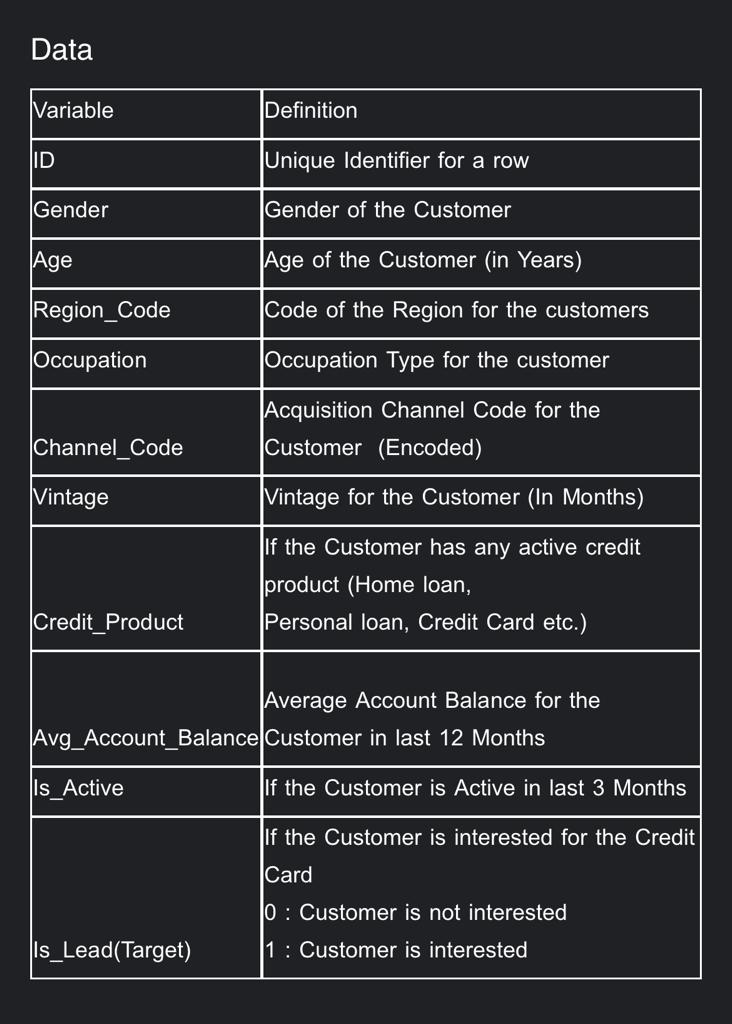

### IMPORT LIBRARIES

In [109]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew,kurtosis
import pylab as p
from scipy.stats import t
from scipy.stats import chi2_contingency
from scipy.stats import t as t_dist
from numpy import sqrt, abs, round
from scipy.stats import norm
from scipy.stats import chi2
import warnings
warnings.filterwarnings(action = 'ignore')

In [144]:
data = pd.read_csv('/content/Data.csv')

In [145]:
data.describe(include='all')

ID  Gender  ...  Is_Active        Is_Lead
count     245725  245725  ...     245725  245725.000000
unique    245725       2  ...          2            NaN
top     EN2PBN56    Male  ...         No            NaN
freq           1  134197  ...     150290            NaN
mean         NaN     NaN  ...        NaN       0.237208
std          NaN     NaN  ...        NaN       0.425372
min          NaN     NaN  ...        NaN       0.000000
25%          NaN     NaN  ...        NaN       0.000000
50%          NaN     NaN  ...        NaN       0.000000
75%          NaN     NaN  ...        NaN       0.000000
max          NaN     NaN  ...        NaN       1.000000

[11 rows x 11 columns]

In [146]:
data.head()

ID  Gender  Age  ... Avg_Account_Balance Is_Active Is_Lead
0  NNVBBKZB  Female   73  ...             1045696        No       0
1  IDD62UNG  Female   30  ...              581988        No       0
2  HD3DSEMC  Female   56  ...             1484315       Yes       0
3  BF3NC7KV    Male   34  ...              470454        No       0
4  TEASRWXV  Female   30  ...              886787        No       0

[5 rows x 11 columns]

In [147]:
(data.isna().sum()/data.shape[0])*100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.934073
Avg_Account_Balance     0.000000
Is_Active               0.000000
Is_Lead                 0.000000
dtype: float64

Since there is only one row containing null value which is present in all columns we can delete that row.

In [148]:
data = data.dropna(subset=['Is_Active'],axis=0)

About **~12%** of the data is missing in **Credit_Product** column which is significant we can go with two strategy i.e one with **imputing null values with mode** and other treating null value as a **seperate category**.Imputing null values with mode doesn't help in visualizing the hidden insights of the data we go forward with treating them as an seperate category.The missing values are filled with 'Unknown' category.

In [149]:
data['Credit_Product'] = data.Credit_Product.fillna('Unknown')

In [150]:
data.Credit_Product.value_counts()

No         144357
Yes         72043
Unknown     29325
Name: Credit_Product, dtype: int64

In [151]:
(data.isna().sum()/data.shape[0])*100

ID                     0.0
Gender                 0.0
Age                    0.0
Region_Code            0.0
Occupation             0.0
Channel_Code           0.0
Vintage                0.0
Credit_Product         0.0
Avg_Account_Balance    0.0
Is_Active              0.0
Is_Lead                0.0
dtype: float64

### TYPECASTING

In [152]:
data.dtypes

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

Segregate the data types and modify object datatype as category and since the dataset have only int type, treat them as numerical type.

In [153]:
for j,i in enumerate(data): 
  if(data[i].dtype=='object'):
    data[i] = data[i].astype('category')

In [154]:
numerical = data.select_dtypes(include=['int64','float64'][:])

In [155]:
numerical = numerical.drop(['Is_Lead'],axis=1)

In [156]:
data.dtypes

ID                     category
Gender                 category
Age                       int64
Region_Code            category
Occupation             category
Channel_Code           category
Vintage                   int64
Credit_Product         category
Avg_Account_Balance       int64
Is_Active              category
Is_Lead                   int64
dtype: object

From the problem statement Is_Lead is the target column and will be performing EDA based on target column for much better understanding of the data.

In [157]:
target = data['Is_Lead']

In [158]:
numerical.head()

Age  Vintage  Avg_Account_Balance
0   73       43              1045696
1   30       32               581988
2   56       26              1484315
3   34       19               470454
4   30       33               886787

*  Binning Age groups to make use in for bivariate 
analysis and acts as a categorical type.

In [159]:
data['Age_band']= 'str'
data.loc[data['Age']<=18,'Age_band']= 'Less than 18'
data.loc[(data['Age']>18)&(data['Age']<=35),'Age_band']='18-35 years'
data.loc[(data['Age']>35)&(data['Age']<=50),'Age_band']='35-50 years'
data.loc[(data['Age']>50)&(data['Age']<=64),'Age_band']='50-64 years'
data.loc[data['Age']>64,'Age_band']='Above 64 years'
data.head()

ID  Gender  Age  ... Is_Active Is_Lead        Age_band
0  NNVBBKZB  Female   73  ...        No       0  Above 64 years
1  IDD62UNG  Female   30  ...        No       0     18-35 years
2  HD3DSEMC  Female   56  ...       Yes       0     50-64 years
3  BF3NC7KV    Male   34  ...        No       0     18-35 years
4  TEASRWXV  Female   30  ...        No       0     18-35 years

[5 rows x 12 columns]

In [160]:
data['vintage_cat'] = 'str'
data.loc[data['Vintage']<=25,'vintage_cat'] = 'Less than 25 months'
data.loc[(data['Vintage']>25)&(data['Vintage']<=50),'vintage_cat'] = '25-50 months' 
data.loc[(data['Vintage']>50)&(data['Vintage']<=75),'vintage_cat'] = '50-75 months'
data.loc[(data['Vintage']>75)&(data['Vintage']<=100),'vintage_cat'] = '75-100 months'
data.loc[data['Vintage']>100,'vintage_cat'] = 'Greater than 100 months'  

In [161]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='winter')

In [162]:
data['vintage_cat'].value_counts().to_frame().style.background_gradient(cmap='winter')

### TREATING OUTLIERS 
Visualizing outliers in average account balance using distplot.From the distplot the graph is **right skewed** and tells that in this bank there are customers who have high balance considering approx 2% of customers are or maybe millionaires.
Considering we are visualizing the middle-class customers we remove millionaires by using **log transformation**.

Text(0.5, 1.0, 'After performing log transformation')

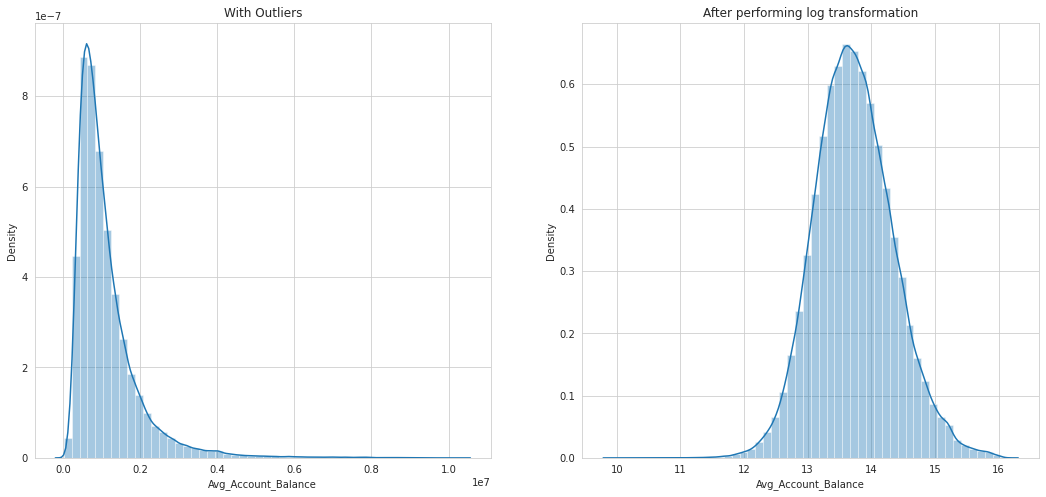

In [163]:
f,ax = plt.subplots(1,2,figsize=(18,8))
sns.distplot(data['Avg_Account_Balance'],ax=ax[0])
ax[0].set_title("With Outliers")
data['Avg_Account_Balance'] = np.log(data['Avg_Account_Balance'])
sns.distplot(data['Avg_Account_Balance'],ax=ax[1])
ax[1].set_title("After performing log transformation")

### PERFORMING EXPLORATORY DATA ANALYSIS

In [36]:
group = ['Age','Vintage','Avg_Account_Balance']

In [37]:
def uva(data,vargroup):
  size = len(vargroup)
  plt.figure(figsize = (10*size,5), dpi = 125)
  for j,i in enumerate(vargroup):
    max = data[i].max()
    min = data[i].min()
    range = [max,min]
    skew = data[i].skew()
    kurtosis = data[i].kurtosis()
    mean = data[i].mean()
    median = data[i].median()
    std = data[i].std()
    point = mean-std, mean+std
    plt.subplot(1,size,j+1)
    sns.lineplot(point,[0,0],color='black',label='Standard Devistion')
    sns.kdeplot(data[i],shade=True)
    sns.scatterplot(mean,[0],color='yellow',label='mean')
    sns.scatterplot(median,[0],color='green',label='median')
    sns.scatterplot(range,[0,0],color='brown',label='min/max')
    plt.title('Skew={},Kurtosis={},variance={}\nmean={},median={}\nStandard Deviation={}'.format(round(skew,2),round(kurtosis,2),round(std**2,2),round(mean,2),median,round(std,2)))

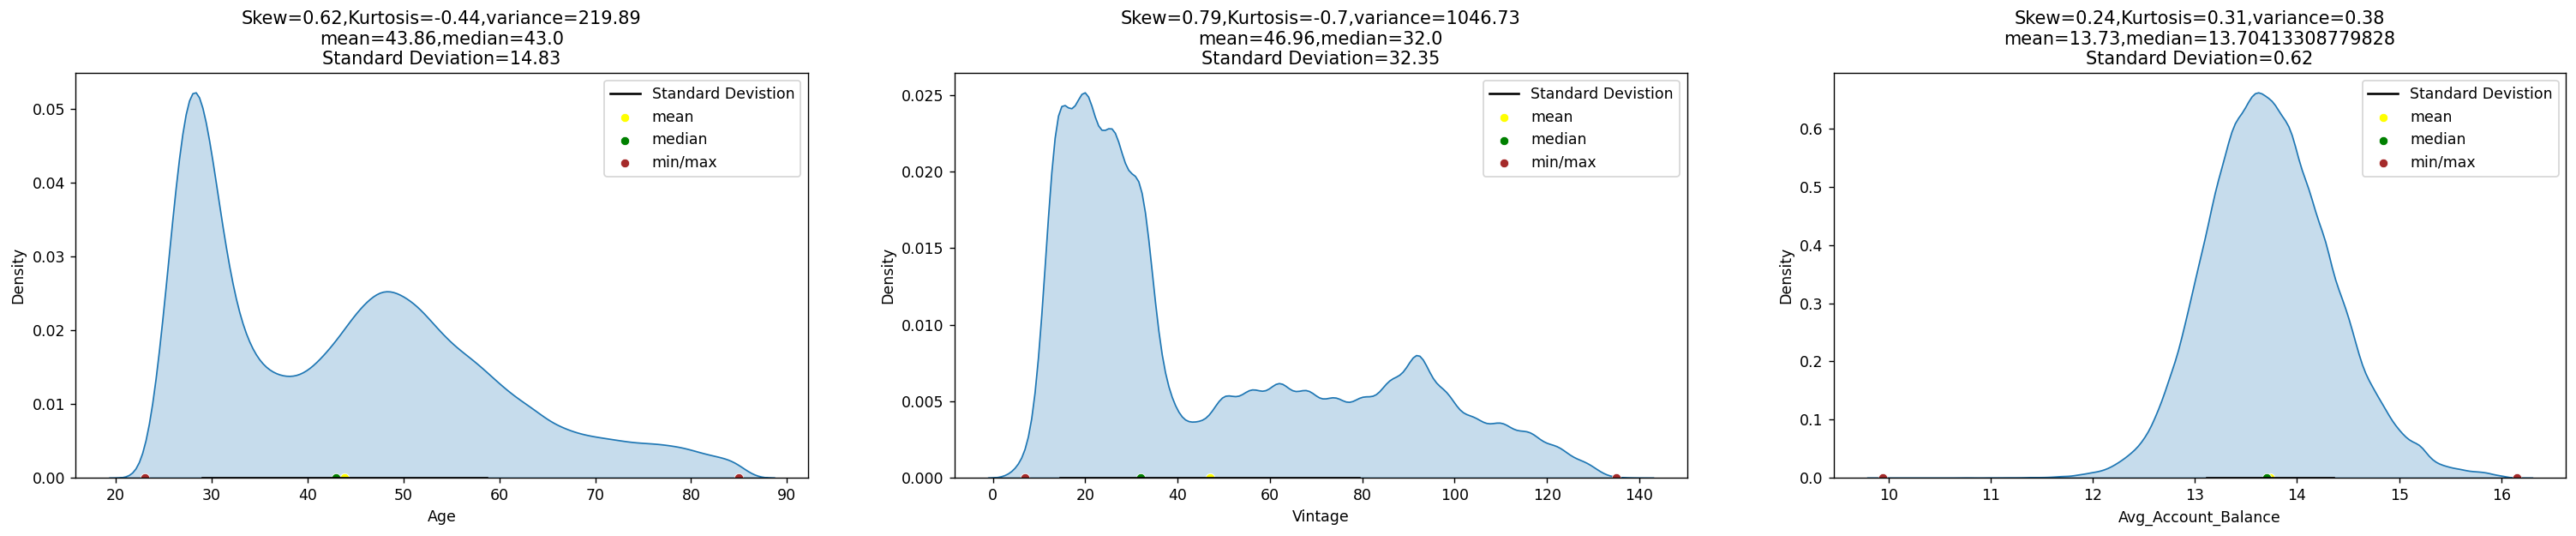

In [38]:
uva(data,group)

**OBSERVATION**:

Avg_Account_Balance

It gives a proper a normal distribution where **skewness is symmetric** as it lies in range -0.5 < x < 0.5, the kurtosis>0 hence it is **leptokurtic** having longer distributiion and fatter tails, the mean and median are very close by indicating a **symmetric in nature**.


Vintage

It doesn't follow normal distribution and have roughly three peaks during the interval period where maximum customers being in the interval 0-40 peaking roughly at 20, the negative value of kurtosis indicate it has **thinner tail** and a longer distributed curve, variance is quite large indicate a huge spread of data.

Age

It doesn't follow normal distribution and have roughly two peaks and have a **high variance** indicating huge spread of data in age group i.e, customers belong to all age group.The overall distribution is symmetric but having **thinner tail and shorter distribution** which also indicate that majority of the customers do not belong to same age group but rather spreaded data values.

BOXPLOT

In [39]:
def boxplot_numeric(data,vargroup,include_outlier=True):
  size = len(vargroup)
  plt.figure(figsize = (7*size,4), dpi = 100)
  for j,i in enumerate(vargroup):
    min = data[i].min()
    max = data[i].max()
    q1 = data[i].quantile(0.25)
    q3 = data[i].quantile(0.75)
    iqr = q3-q1
    left_whisker = q1-(1.5*iqr)
    right_whisker = q3+(1.5*iqr)
    median = data[i].median()
    skew = data[i].skew()
    kurtosis = data[i].kurtosis()
    outlier_max = len(data[data[i]>right_whisker])
    outlier_min = len(data[data[i]<left_whisker])
    plt.subplot(1,size,(j+1))
    sns.boxplot(data[i])
    plt.title('Q1={},Q3={},IQR={}\nmedian={},skew={}\nKurtosis={},Outliers(max/min)={}'.format(round(q1,2),round(q3,2),round(iqr,2),median,round(skew,2),round(kurtosis,2),(outlier_max,outlier_min)))

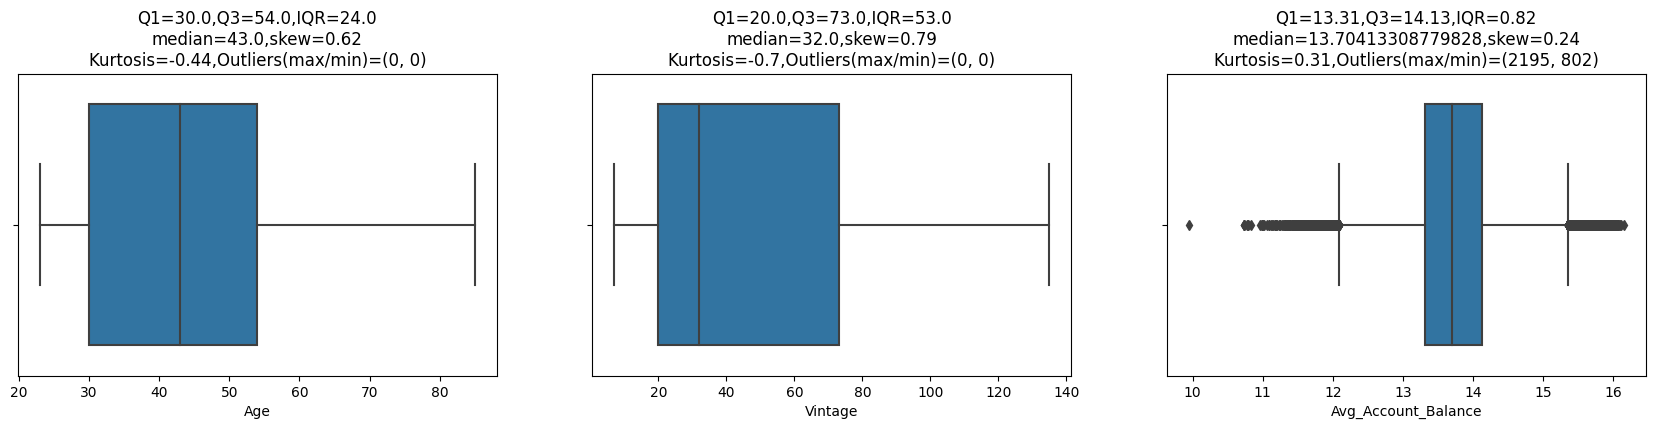

In [40]:
boxplot_numeric(data,group)

**OBSERVATION:**

From the boxplot we noticed, there are **no outliers in age and vintage columns** but there are presence of **outliers in avg_account_balance in the both sides of whisker region.**
The plot of age is **left skewed** which can intrepetated from median in boxplot which is slightly towards right direction rather than falling at the middle.The boxplot of Vintage is **right skewed** as the median is towards the left hand side of the boxplot.The boxplot of avg_account_balance is the symmetric in nature as the median line is exactly at the middle.

## UNIVARIATE CATEGORICAL ANALYSIS

In [41]:
group1 = ['Gender','Occupation','Credit_Product','Is_Active']

In [42]:
def UVA_category(data, var_group):
  size = len(var_group)
  plt.figure(figsize = (12*size,8), dpi = 100)
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

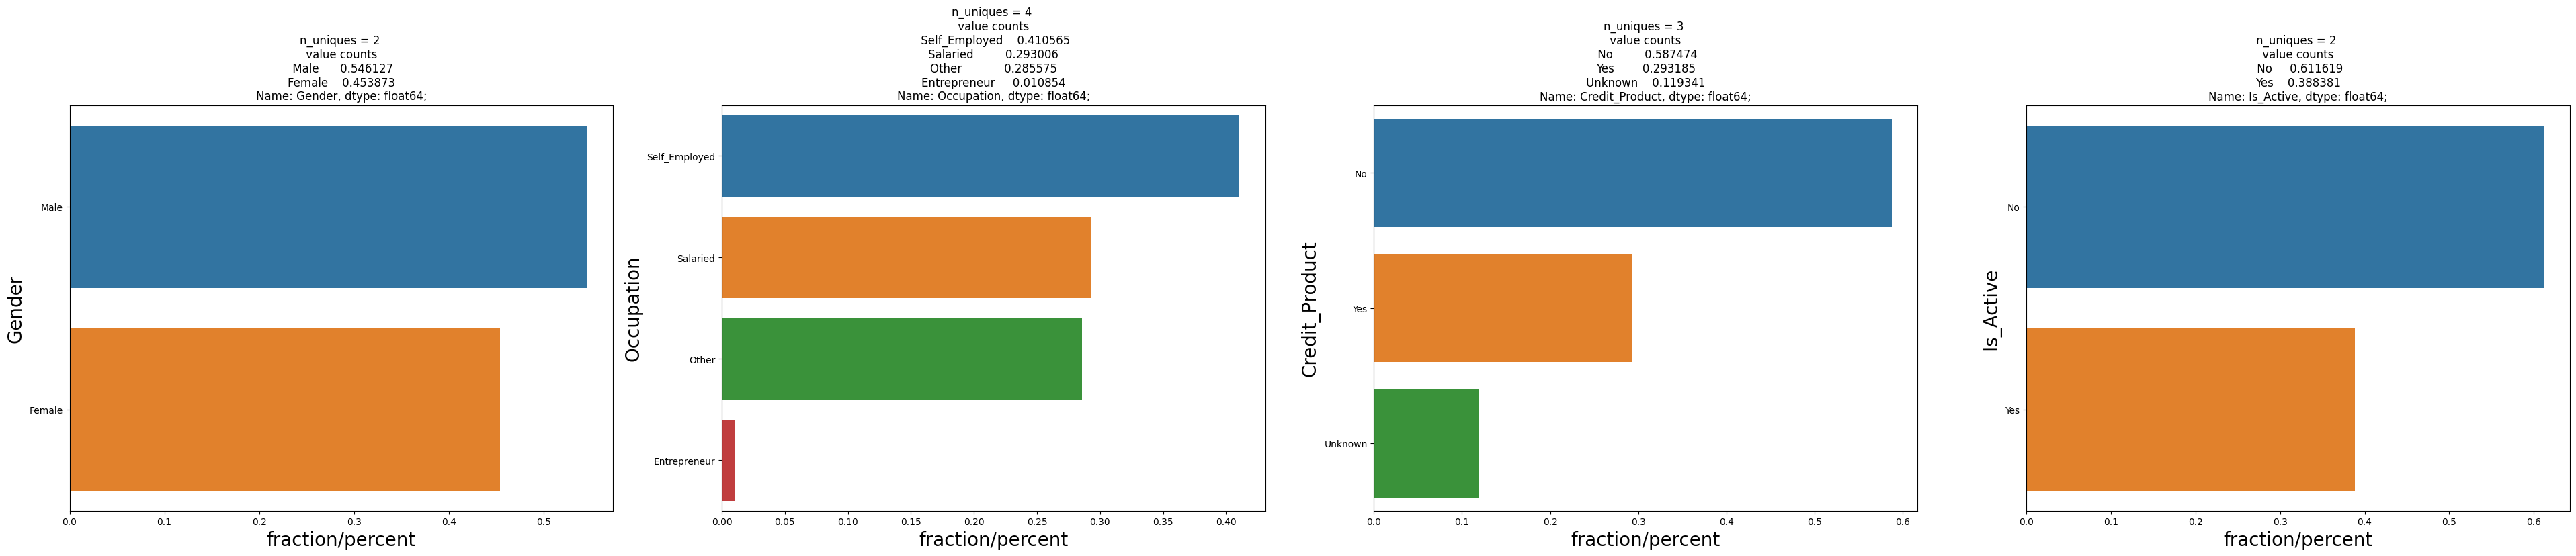

In [43]:
UVA_category(data,group1)

**OBSERVATIONS:**

*   Around **54%** of the customers are Male and **45%** of the customers are female.
*   Around 41% of the cstomers are self employed and about 1% are entrepreneurs.
*   Around 58% of the customers does not have credit product.
*   Around 36% of the customers are currently active and using the services of the bank.

REGION CODE

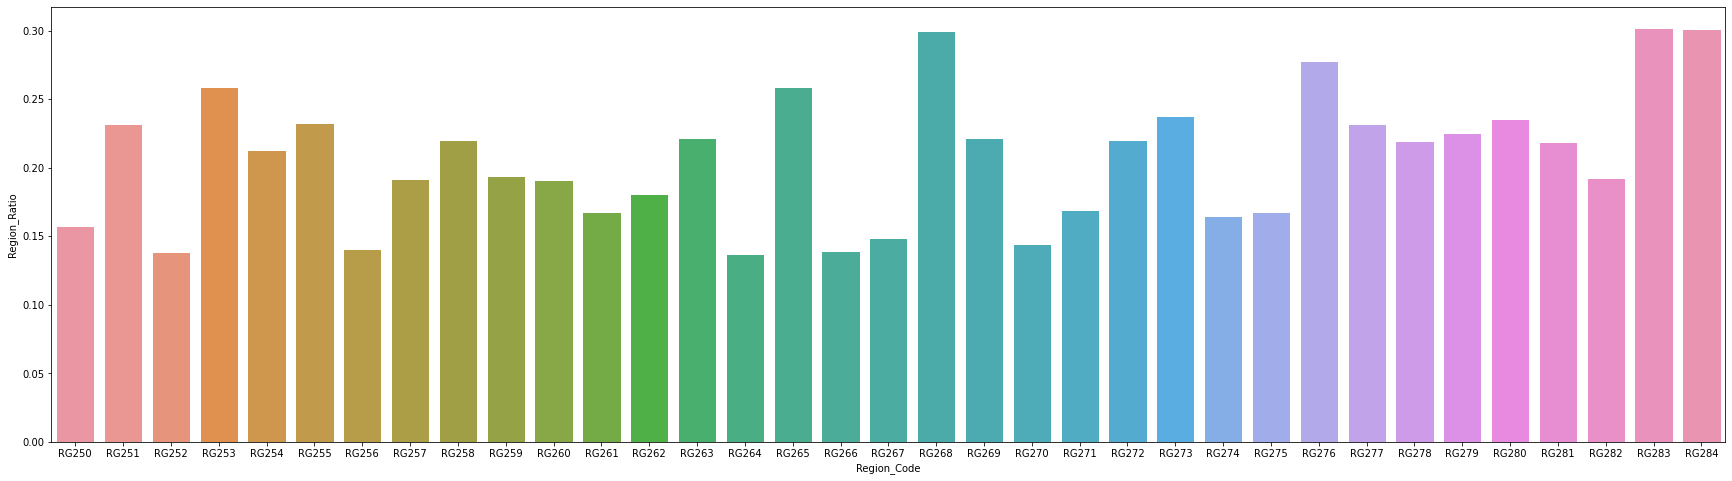

In [44]:
region = data.groupby('Region_Code').Is_Lead.value_counts().unstack()
region['Region_Ratio'] = region[1]/(region[0] + region[1])
region.reset_index(inplace=True)
ax = plt.subplots(figsize=(30, 8))
sns.set_style("whitegrid")
sns.barplot(x='Region_Code', y='Region_Ratio', data=region.sort_values(by='Region_Ratio',ascending=False))

**OBSERVATION:**


*   Region code of **RG268,RG283** and **RG284** shows region where customers are **more** interested to purchase credit card giving an ratio of acceptance of **0.3**.
*   Region code of **RG252,RG256,RG264,RG266** and **RG270** shows region code where customers are **less** interested to purchase credit card giving an acceptance ratio of **0.14**.

VIOLINPLOT

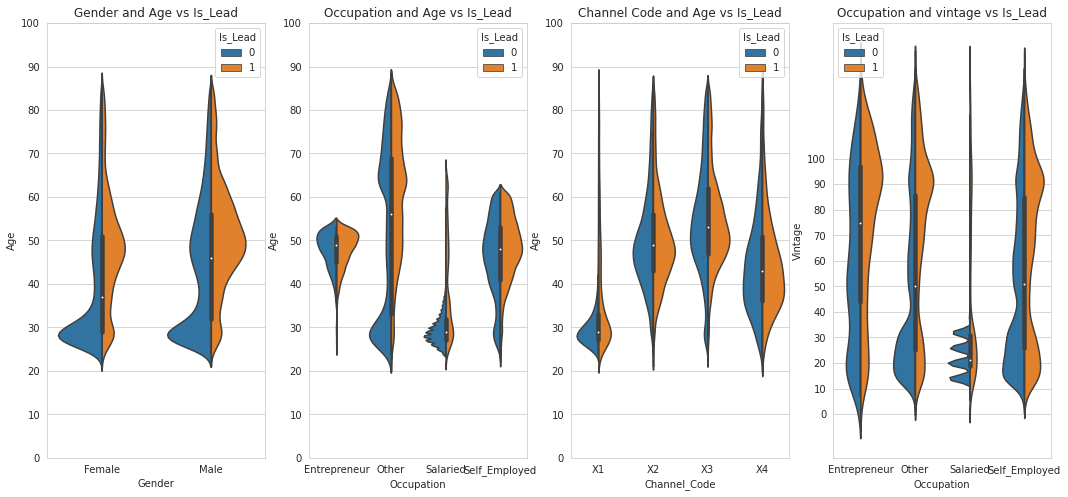

In [45]:
f,ax = plt.subplots(1,4,figsize=(18,8))
sns.violinplot("Gender","Age", hue="Is_Lead", data=data,split=True,ax=ax[0])
ax[0].set_title('Gender and Age vs Is_Lead')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Occupation","Age", hue="Is_Lead", data=data,split=True,ax=ax[1])
ax[1].set_title('Occupation and Age vs Is_Lead')
ax[1].set_yticks(range(0,110,10))
sns.violinplot("Channel_Code","Age",hue="Is_Lead",data=data,split=True,ax = ax[2])
ax[2].set_title('Channel Code and Age vs Is_Lead')
ax[2].set_yticks(range(0,110,10))
sns.violinplot("Occupation","Vintage",hue="Is_Lead",data=data,split=True,ax = ax[3])
ax[3].set_title('Occupation and vintage vs Is_Lead')
ax[3].set_yticks(range(0,110,10))
plt.show()

**OBSERVATION:**

Male/Female vs Is_Lead

From the violinplot male and female of age group 28 are less interested to purchase credit card.Male of age 50 are more interested to purchase credit card and females around age of 50 are more interested to purchase credit card.

Occupation vs Is_Lead

From the violinplot entrepreneur are more interested to buy credit card at age 50 also less likely at age 50 which does tell entrepreneur shows 50-50 chance of purchasing credit card.Salaried customers are less interested to buy credit card at age 25 which tells they do not prefer purchasing credit card when they start their career rather they buy credit card when they have experience or retired.Employed customers shows same behaviour as entrepreneur but rather the data is more distributed.

Channel Code vs Is_Lead

Channel code X1 of age 30 shows high interest to purchase credit card and channel code x2 of age 50 shows high interest to purchase credit card and channel code x3 of age 55 shows high interest to purchase credit card.For X4 of age 40 shows high interest to purchase credit card.

CHANNEL CODE VS IS_LEAD

Text(0.5, 1.0, 'Channel Code vs Ratio of Positive Response for Is_Lead')

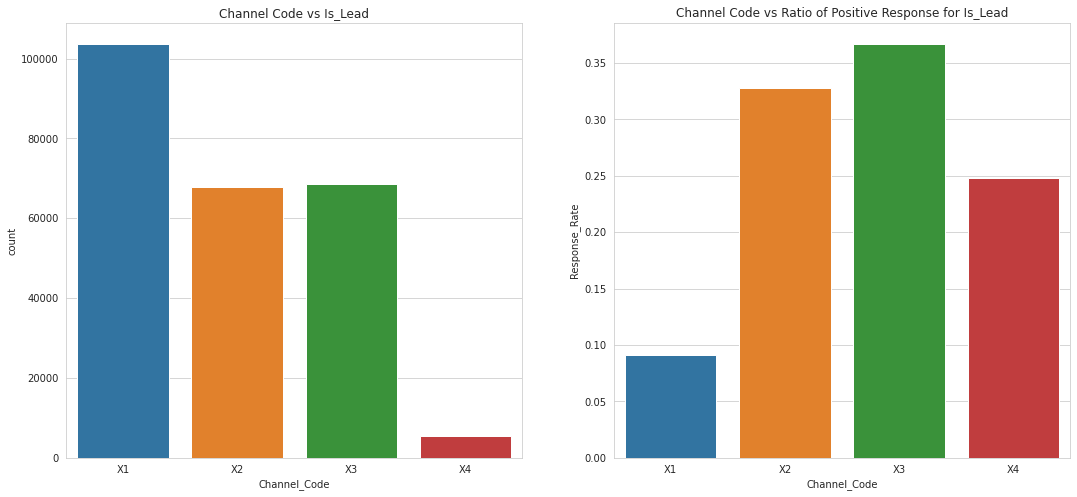

In [46]:
f,ax = plt.subplots(1,2,figsize =(18,8))
sns.countplot(x='Channel_Code',data = data,ax=ax[0])
ax[0].set_title('Channel Code vs Is_Lead') 
response = data.groupby('Channel_Code').Is_Lead.value_counts().unstack()
response['Response_Rate'] = response[1]/(response[0] + response[1])
response.reset_index(inplace=True)
sns.set_style("whitegrid")
sns.barplot(x='Channel_Code', y='Response_Rate',data=response.sort_values(by=['Response_Rate'], ascending=True),ax=ax[1])
ax[1].set_title('Channel Code vs Ratio of Positive Response for Is_Lead')

**OBSERVATION:**

*   Channel code X1 shows **high response** but **less positive response**.
*   Channel code X2 and X3 have same response count but X3 has **highest positive response rate** for purchasing credit card.
*   Though X4 has **least response count** but have **high positive response rate**.

ACTIVE VS RESPONSE RATE

Text(0.5, 1.0, 'Is Active vs Ratio of Positive response for Is_Lead')

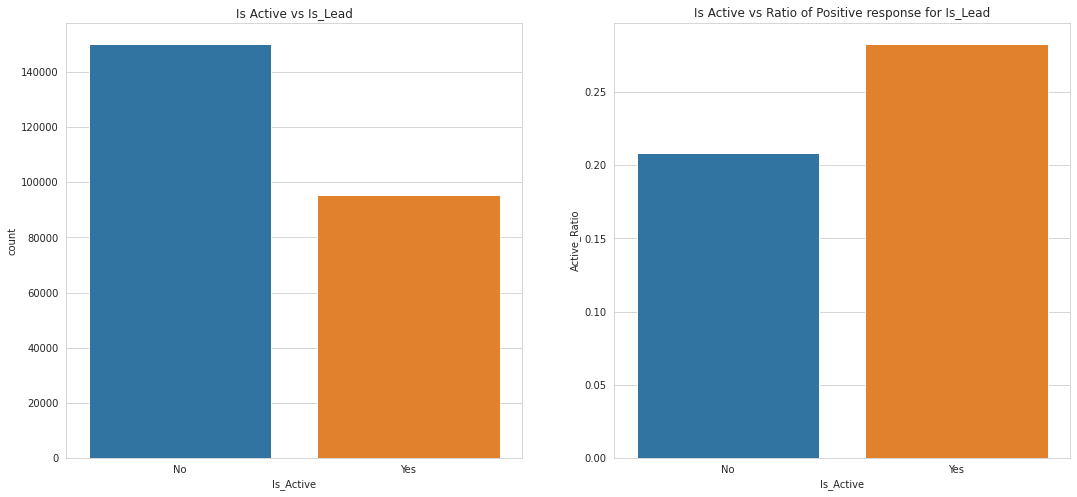

In [47]:
f,ax = plt.subplots(1,2,figsize =(18,8))
sns.countplot(x='Is_Active',data = data,ax=ax[0])
ax[0].set_title('Is Active vs Is_Lead') 
active = data.groupby('Is_Active').Is_Lead.value_counts().unstack()
active['Active_Ratio'] = active[1]/(active[0] + active[1])
active.reset_index(inplace=True)
sns.set_style("whitegrid")
sns.barplot(x='Is_Active', y='Active_Ratio', data=active.sort_values(by=['Active_Ratio'], ascending=False),ax=ax[1])
ax[1].set_title('Is Active vs Ratio of Positive response for Is_Lead')

**OBSERVATION:**

*   Customers who are **active** have **less count** but have **high positive response** for purchsing credit card.
*   Customers who are **not active** have **highest count** but **have loss positive response** for purchasing credit card.

CREDIT PRODUCT VS RESPONSE RATE

Text(0.5, 1.0, 'Credit Product vs Ratio of Positive response for Is_Lead')

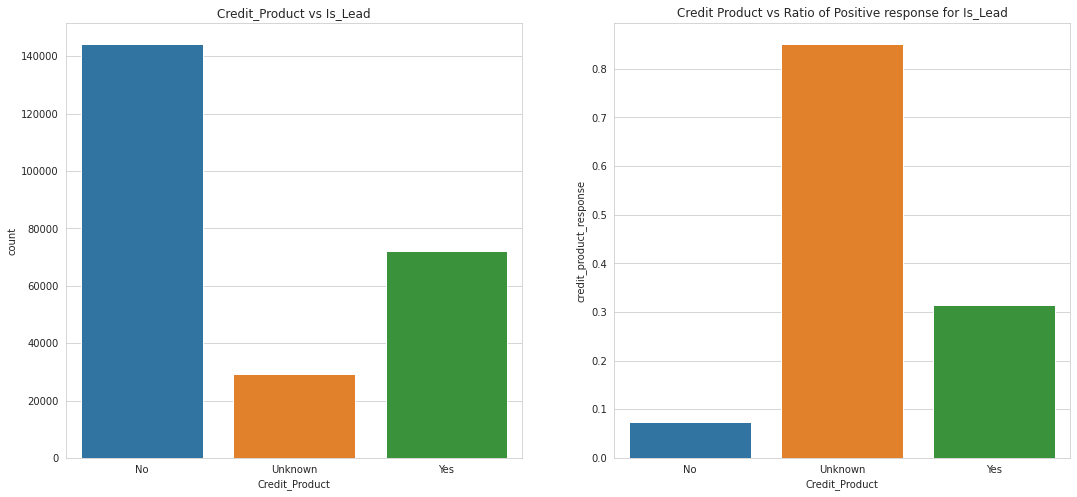

In [48]:
f,ax = plt.subplots(1,2,figsize =(18,8))
sns.countplot(x='Credit_Product',data = data,ax=ax[0])
ax[0].set_title('Credit_Product vs Is_Lead') 
credit = data.groupby('Credit_Product').Is_Lead.value_counts().unstack()
credit['credit_product_response'] = credit[1]/(credit[0] + credit[1])
credit.reset_index(inplace=True)
sns.set_style("whitegrid")
sns.barplot(x='Credit_Product', y='credit_product_response', data=credit.sort_values(by=['credit_product_response'], ascending=True),ax=ax[1])
ax[1].set_title('Credit Product vs Ratio of Positive response for Is_Lead')

**OBSERVATION:**

*   Customers who **have credit product** have **less count** and are **least interested** in purchasing credit card.
*   Customers who **doesn't have credit product** have **highest response** but are **least interested** in purchasing credit card.
*   Customers whose credit product **is not defined** have **highest positive response rate** for purchasing credit card.

OCCUPATION VS RESPONSE RATE

Text(0.5, 1.0, 'Occupation vs Ratio of Positive response for Is_Lead')

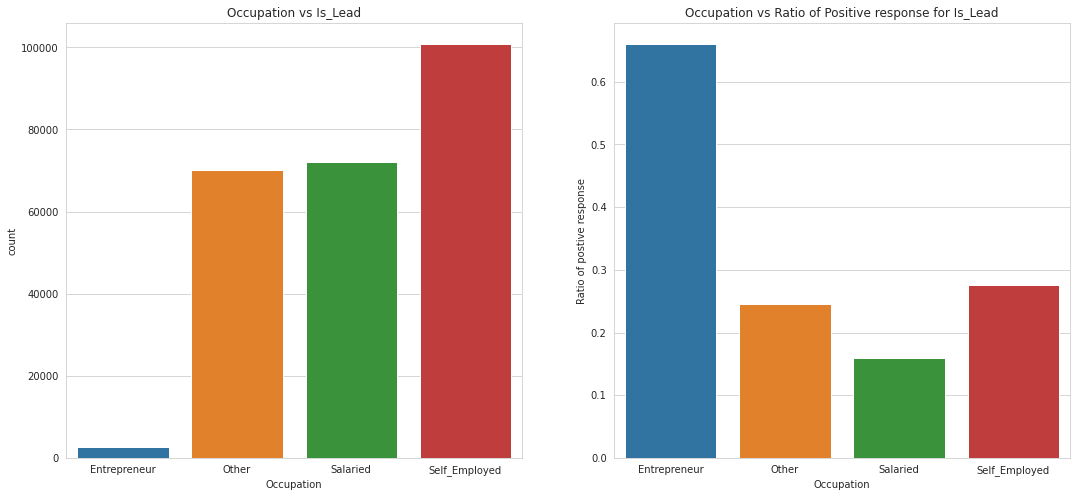

In [49]:
f,ax = plt.subplots(1,2,figsize =(18,8))
sns.countplot(x='Occupation',data = data,ax=ax[0])
ax[0].set_title('Occupation vs Is_Lead') 
occupation = data.groupby('Occupation').Is_Lead.value_counts().unstack()
occupation['Ratio of postive response'] = occupation[1]/(occupation[0] + occupation[1])
occupation.reset_index(inplace=True)
sns.set_style("whitegrid")
sns.barplot(x='Occupation', y='Ratio of postive response', data=occupation.sort_values(by=['Ratio of postive response'], ascending=False),ax=ax[1])
ax[1].set_title('Occupation vs Ratio of Positive response for Is_Lead')

**OBSERVATION:**

*   Entrepreneur are **less in numbers** but have **highest positive response** rate which is over **0.68**.
*   Self employed are **highest in numbers** but have **less positive response ratio** which is around 0.28.

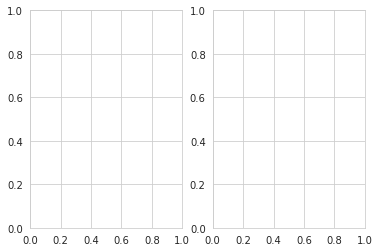

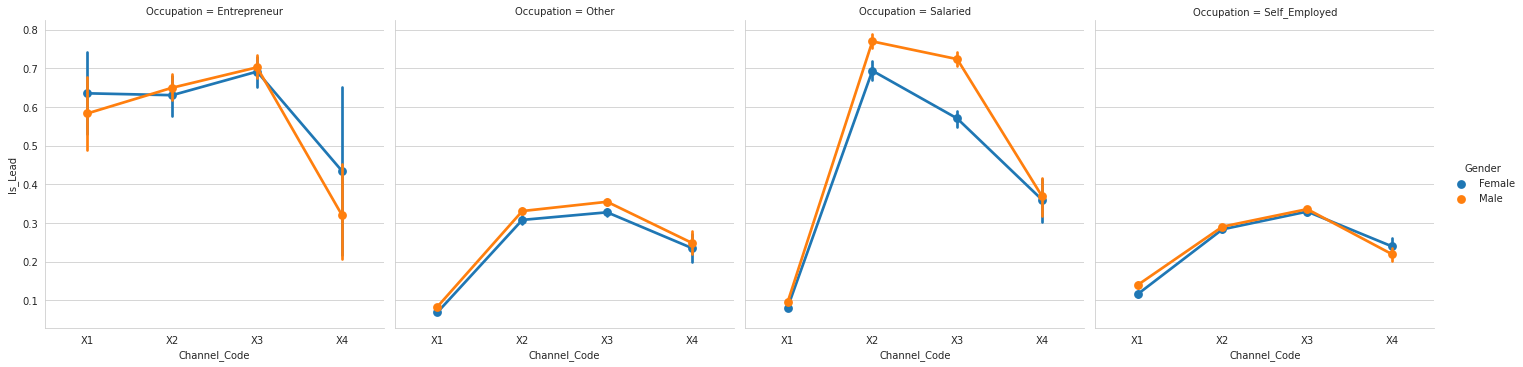

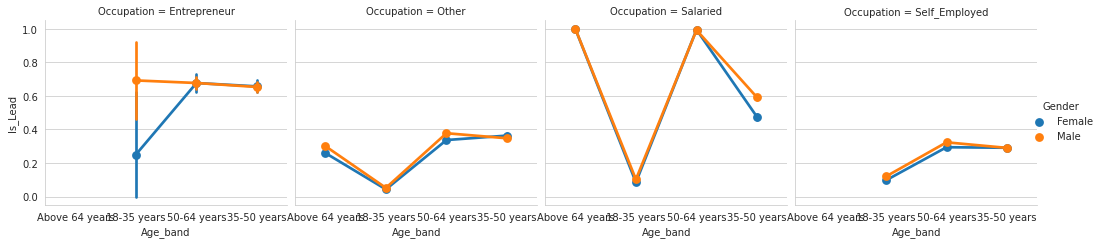

In [50]:
f,ax = plt.subplots(1,2)
sns.factorplot('Channel_Code','Is_Lead',hue='Gender',col='Occupation',data=data,ax=ax[0])
sns.factorplot('Age_band','Is_Lead',hue='Gender',col='Occupation',data=data,ax=ax[1])
fig=plt.gcf()
fig.set_size_inches(15,3)

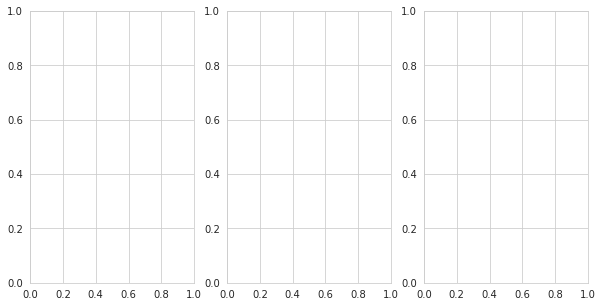

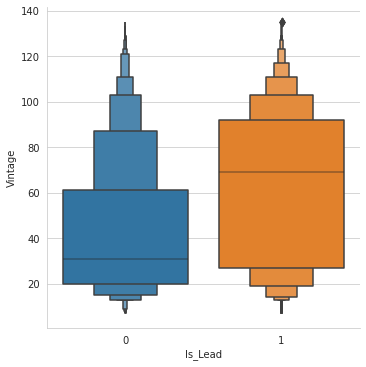

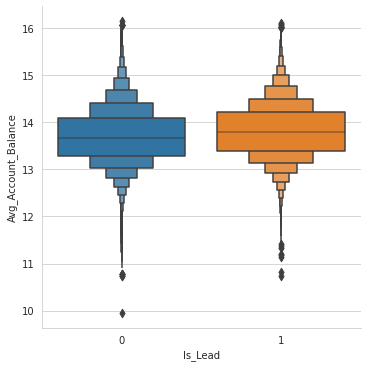

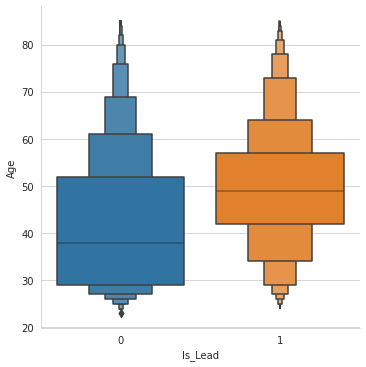

In [51]:
f,ax = plt.subplots(1,3,figsize=(10,5))
sns.catplot(x='Is_Lead', y='Vintage', kind='boxen', data=data,ax=ax[0])
sns.catplot(x='Is_Lead', y='Avg_Account_Balance', kind='boxen',data=data,ax=ax[1])
sns.catplot(x='Is_Lead', y='Age', kind='boxen', data=data,ax=ax[2])

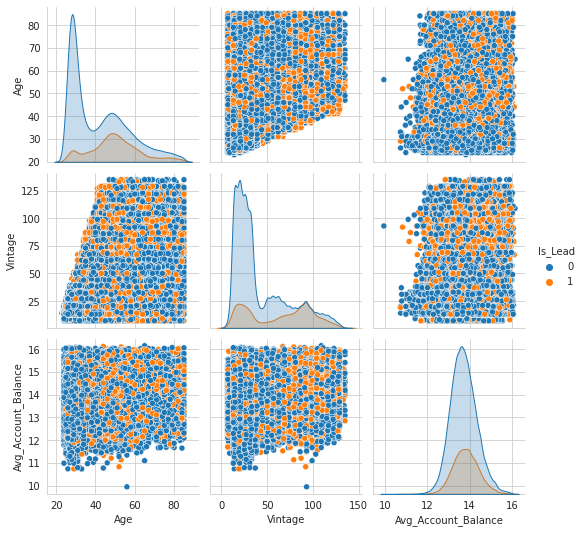

In [53]:
sns.pairplot(data,hue='Is_Lead')

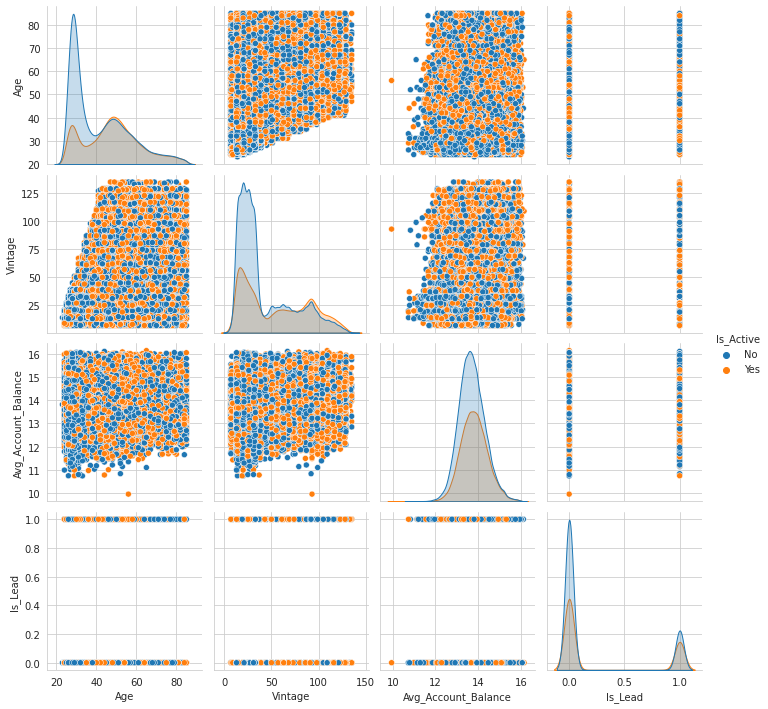

In [54]:
sns.pairplot(data,hue='Is_Active')

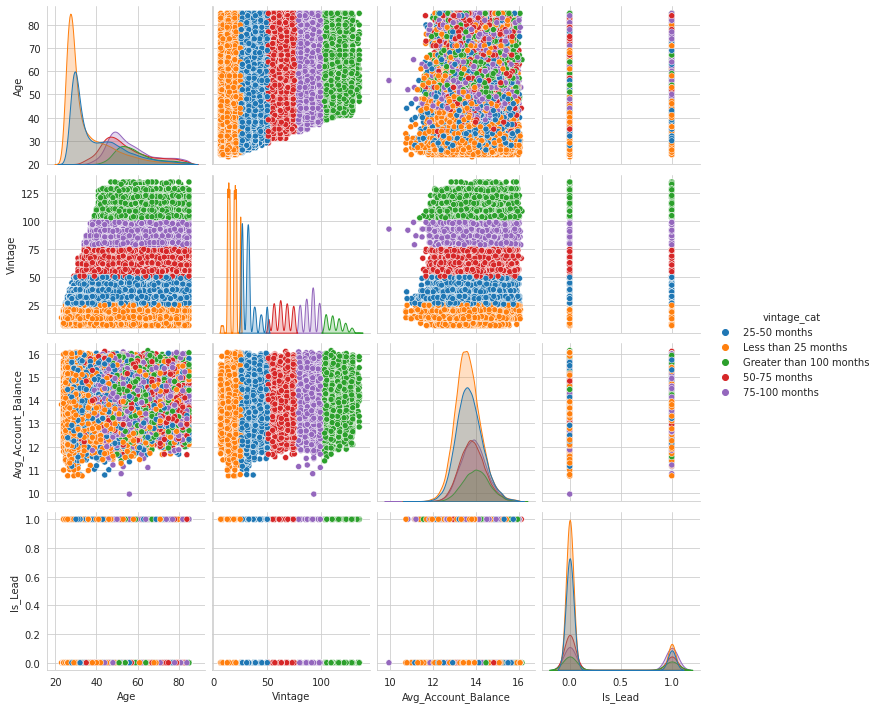

In [55]:
sns.pairplot(data,hue='vintage_cat')

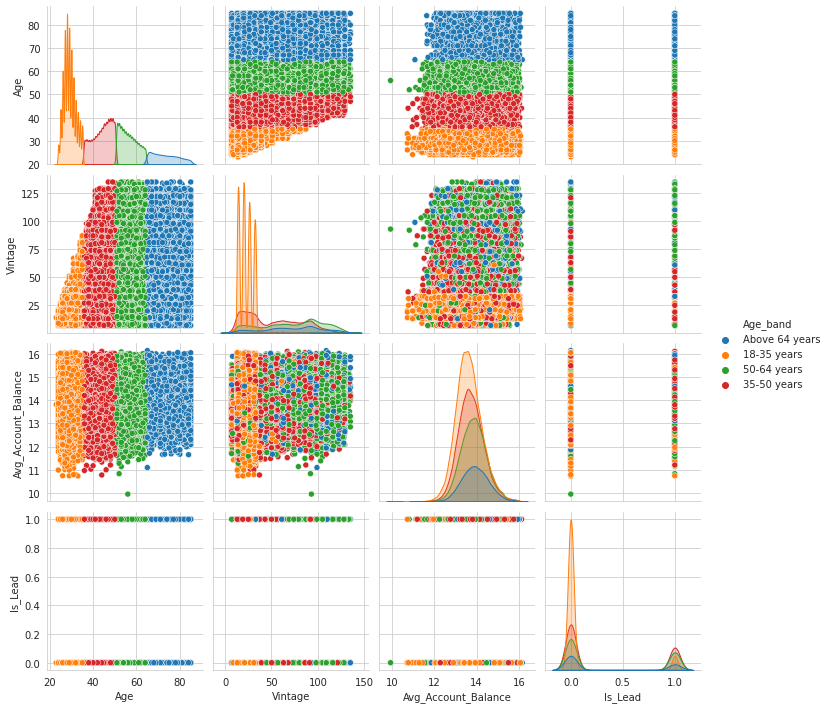

In [56]:
sns.pairplot(data,hue='Age_band')

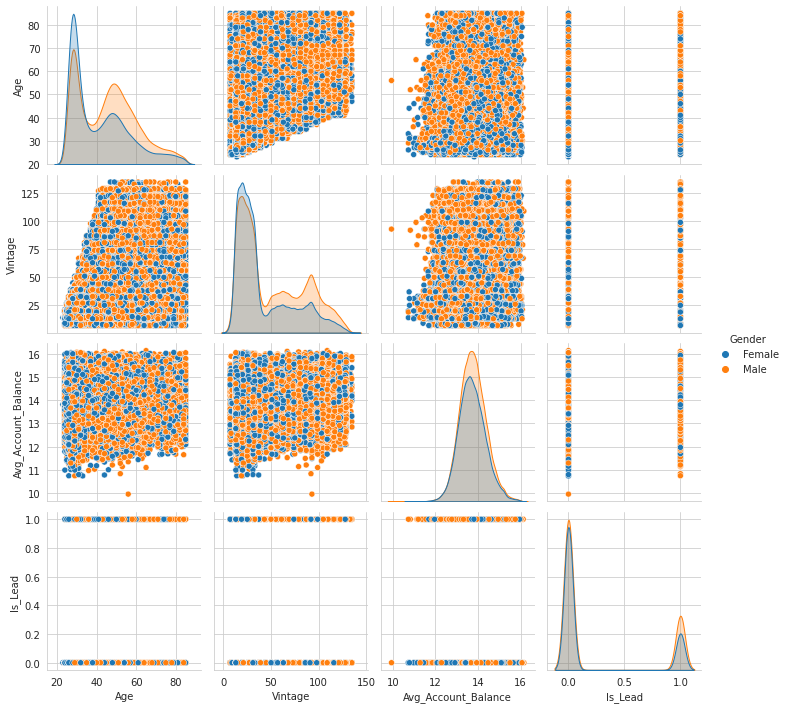

In [57]:
sns.pairplot(data,hue='Gender')

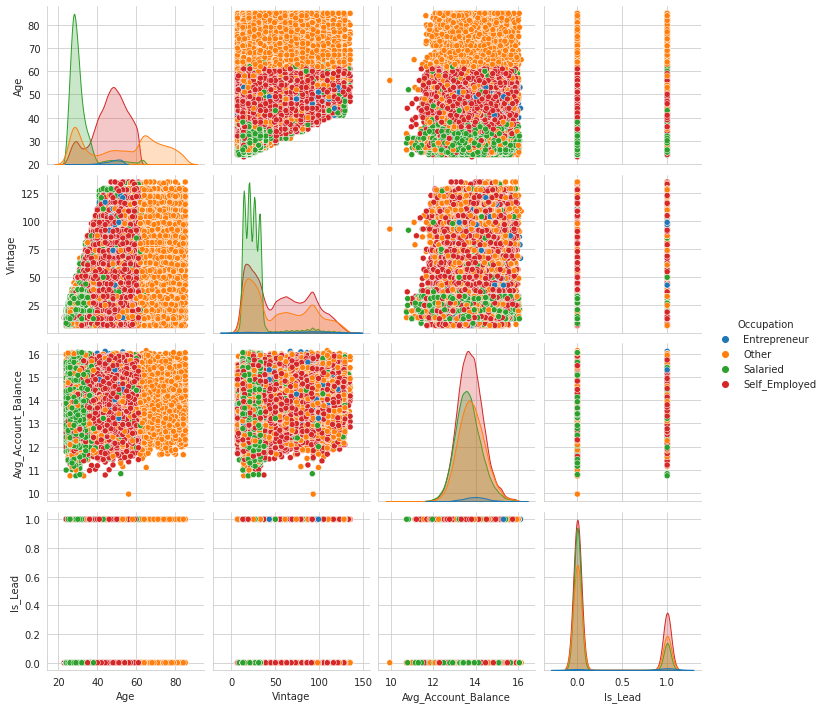

In [58]:
sns.pairplot(data,hue='Occupation')

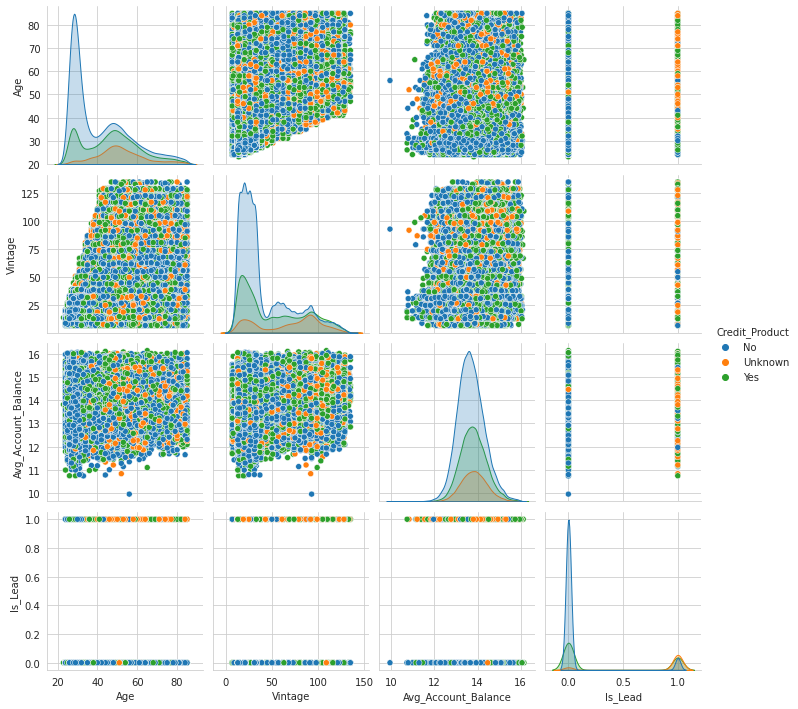

In [59]:
sns.pairplot(data,hue='Credit_Product')

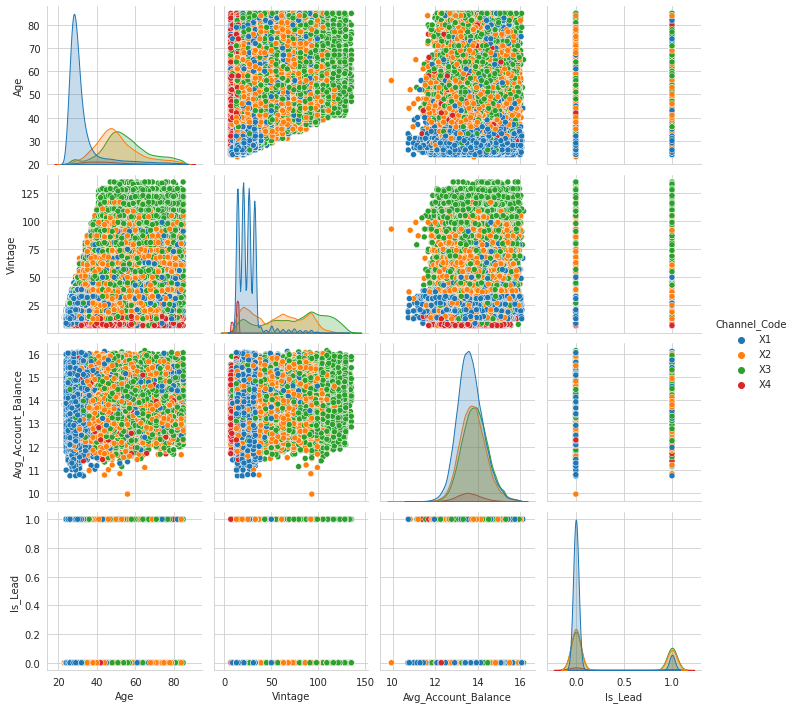

In [60]:
sns.pairplot(data,hue='Channel_Code')

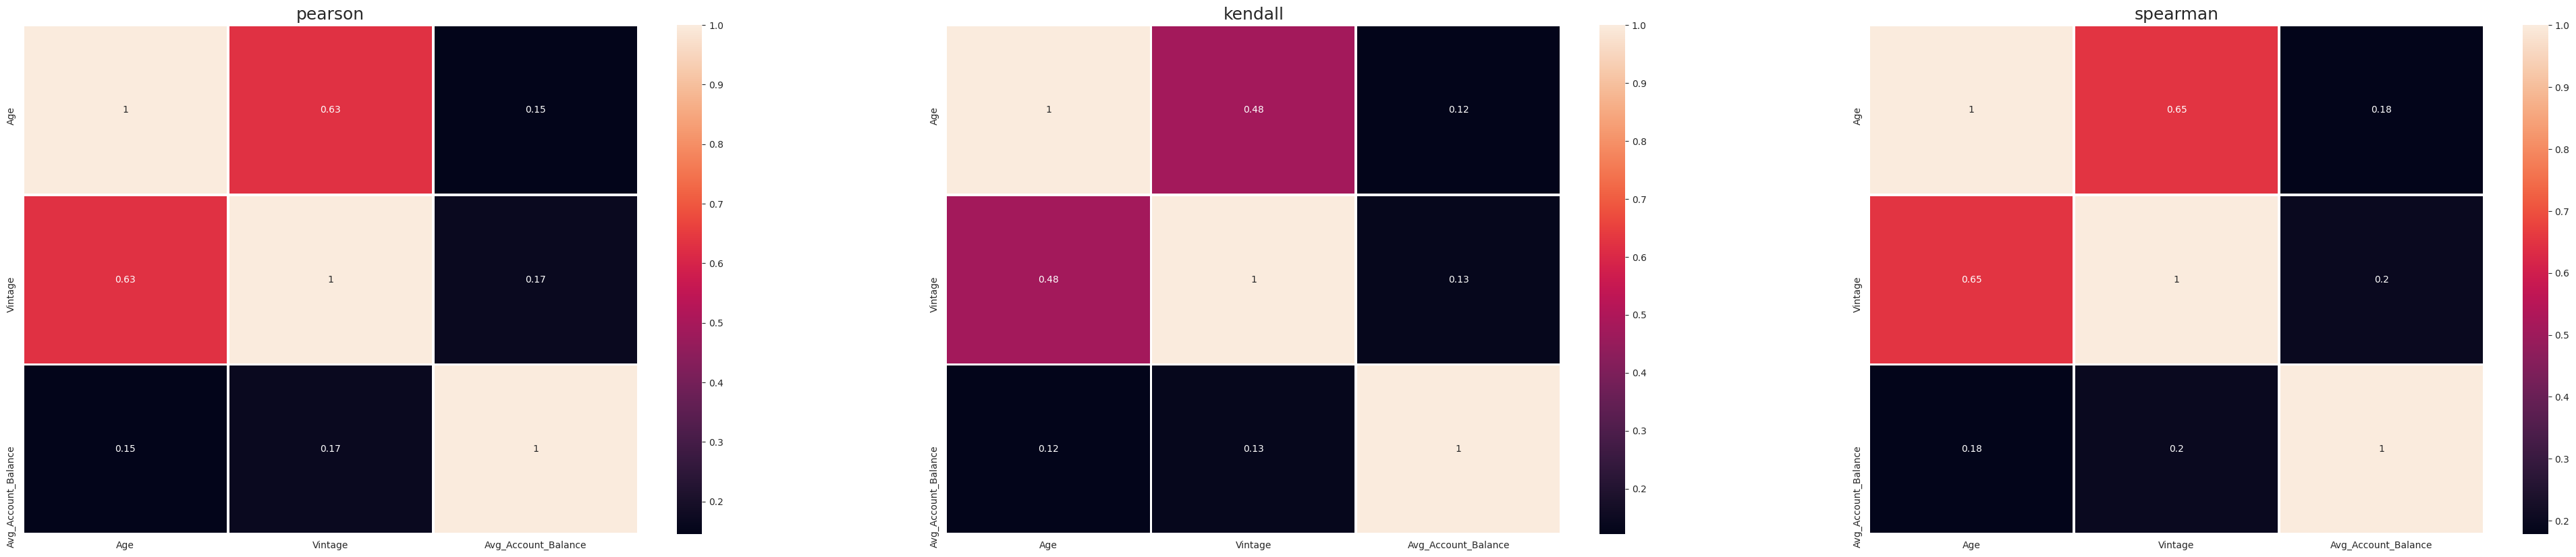

In [62]:
plt.figure(figsize=(50,10), dpi=100)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2,annot=True,fmt='0.2g')
  plt.title(i, fontsize=18)

## CATEGORICAL-CATEGORICAL

To perform categorical-categorical data analysis, chi-square hypothesis testing is performed. 

*   Does Gender have a significant impact on the Is_Lead?
*   Does Credit Product has a significant impact on the Is_lead?
*   Does Is_Active has a significant impact on the Is_Lead?
*   Does Occupation has a significant impact on the Is_Lead?
*   Does Channel_Code has a significant impact on the Is_Lead?
*   Does Age_Band has a significant impact on the Is_Lead?
*   Does vintage_cat has a significant impact ont he IS_Lead? 



In [100]:
def BVA_categorical_plot(data, tar, cat):
  data = data[[cat,tar]][:]
  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])
  chi, p, dof, expected = chi2_contingency(f_obs)
  chi2_contingency(table)
  chi2_test_stat = chi2_contingency(table)[0]
  pval = chi2_contingency(table)[1]
  df = chi2_contingency(table)[2]
  confidence_level = 0.90
  alpha = 1 - confidence_level
  chi2_critical = chi2.ppf(1 - alpha, df)  
  f,ax = plt.subplots(1,3,figsize=(18,8))

  x_min = -5
  x_max = 20

  # Ploting the graph and setting the x limits
  x = np.linspace(x_min, x_max, 100)
  y = chi2.pdf(x, df)
  plt.xlim(x_min, x_max)
  ax[0].plot(x, y)


  # Setting Chi2 Critical value 
  chi2_critical_right = chi2_critical

  # Shading the right rejection region
  x1 = np.linspace(chi2_critical_right, x_max, 100)
  y1 = chi2.pdf(x1, df)
  ax[0].fill_between(x1, y1, color='orange')
  if p<0.05:
    sig = True
  else:
    sig = False
  sns.countplot(x=cat, hue=tar, data=data,ax=ax[1])
  ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()*100
  ax1.plot(kind='bar', stacked='True',title=str(ax1),ax=ax[2])
  int_level = data[cat].value_counts()
  if(chi2_test_stat > chi2_critical):
    print("Reject Null Hypothesis")
  else:
    print("Fail to Reject Null Hypothesis")
  print("p-value = {}\n Is significant= {}\n Chi-square = {}".format(round(p,5),sig,round(chi,2)))

 *   Does **Gender** have a significant impact on the **Is_Lead**?

Reject Null Hypothesis
p-value = 0.0
 Is significant= True
 Chi-square = 1275.9


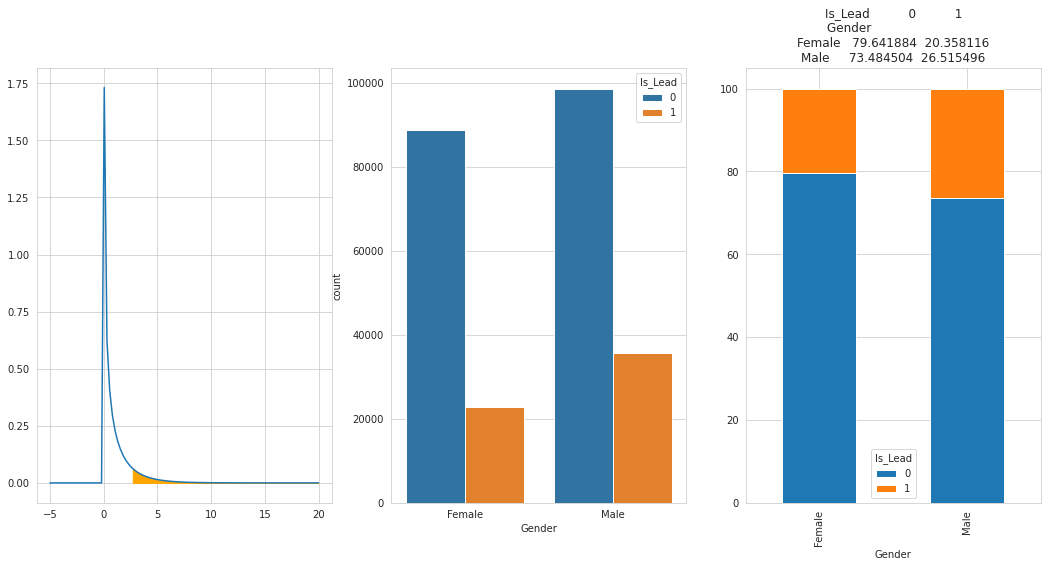

In [168]:
BVA_categorical_plot(data, 'Is_Lead', 'Gender')

**OBSERVATIONS:**
*   By the p_value of Chi square test, we can assume that the difference between the males and females is significant the gender has a significant impact on the Is_Lead.
*   By the frequecies, we can assume that Male are more likely to purchase credit card.

Does **Credit Product** has a significant impact on the Is_lead?


Reject Null Hypothesis
p-value = 0.0
 Is significant= True
 Chi-square = 84955.2


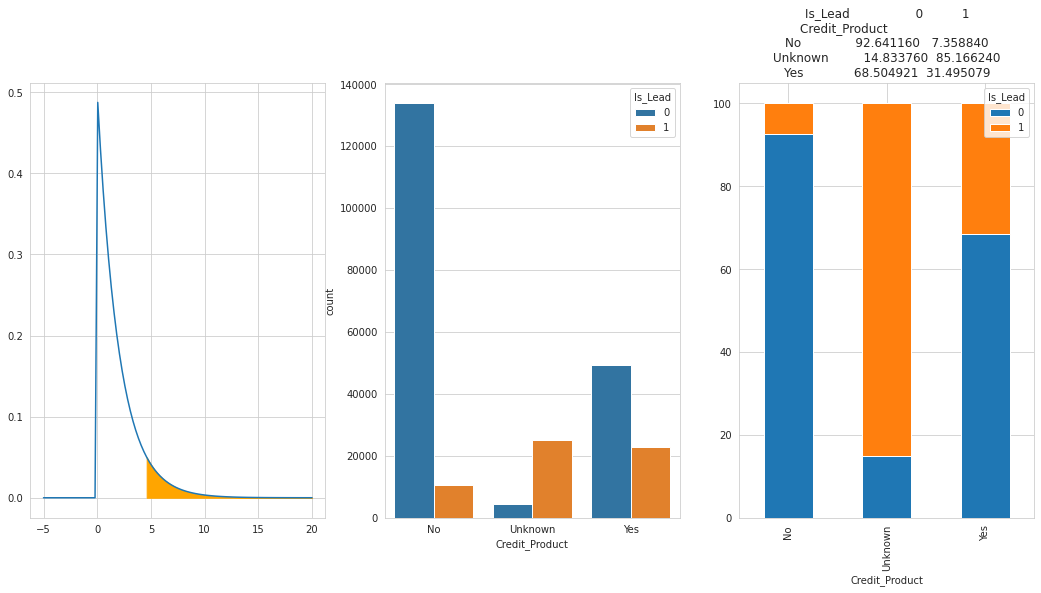

In [103]:
BVA_categorical_plot(data, 'Is_Lead', 'Credit_Product')

**OBSERVATIONS:**
*   By the p_value of Chi square test, we can assume that the difference whether the customer have credit product and the unknown is significant and the credit product has a significant impact on the Is_Lead.
*   By the frequecies, we can assume that Unknown are more likely to purchase credit card.

Does **Is_Active** has a significant impact on the **Is_Lead**?

Reject Null Hypothesis
p-value = 0.0
 Is significant= True
 Chi-square = 1805.3


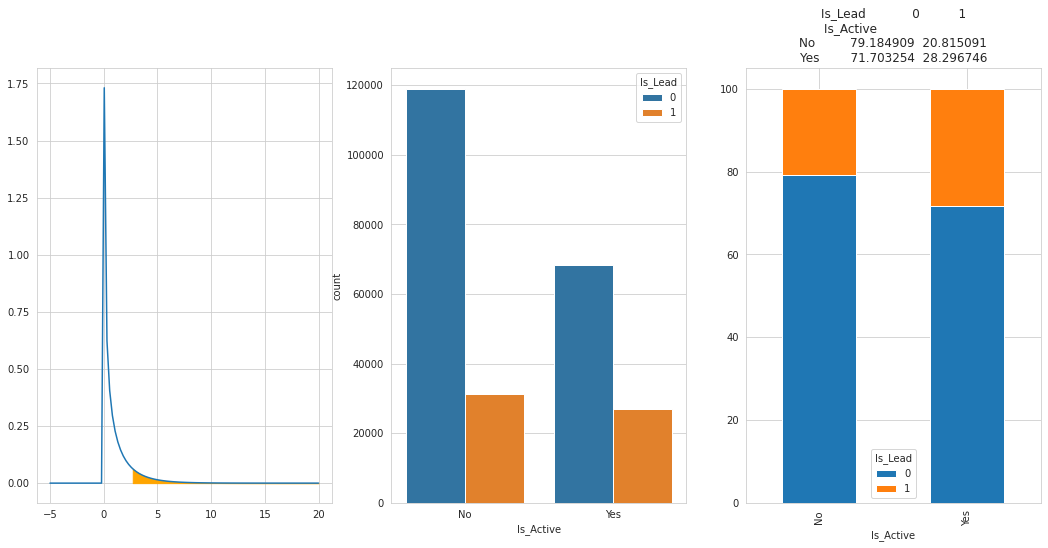

In [104]:
BVA_categorical_plot(data, 'Is_Lead', 'Is_Active')

**OBSERVATIONS:**
*   By the p_value of Chi square test, we can assume that the whether the customer is active or not is significant and customer activeness has a significant impact on the Is_Lead.
*   By the frequecies, we can assume that customers who are active are more likely to purchase credit card.

Does **Occupation** has a significant impact on the **Is_Lead**?

Reject Null Hypothesis
p-value = 0.0
 Is significant= True
 Chi-square = 5896.25


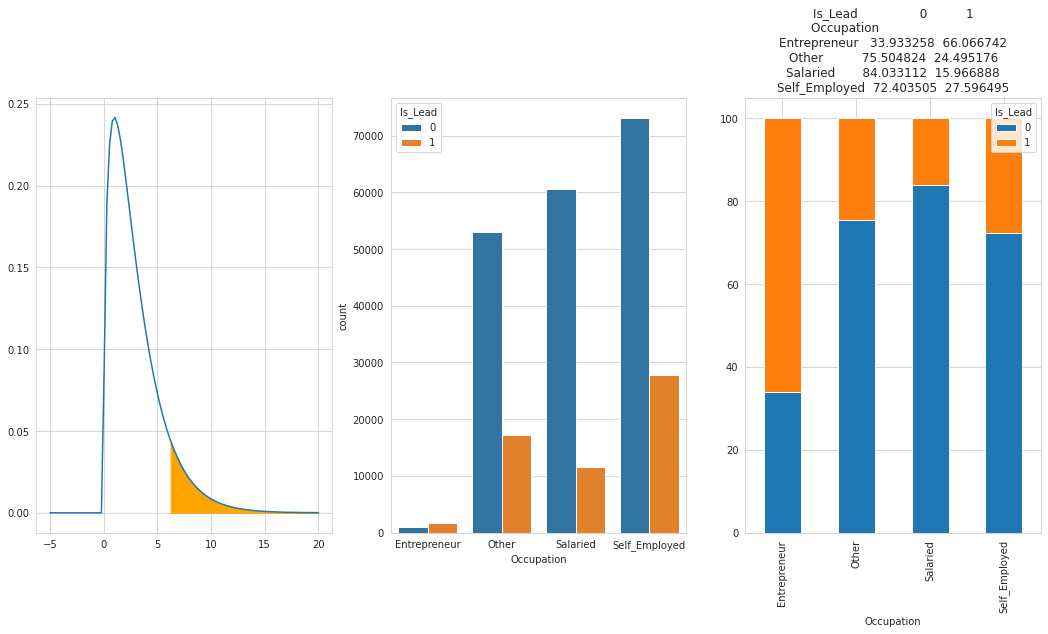

In [105]:
BVA_categorical_plot(data, 'Is_Lead', 'Occupation')

**OBSERVATIONS:**
*   By the p_value of Chi square test, we can assume that the occupation has a significant impact on the Is_Lead.
*   By the frequecies, we can assume that entrepreneur are more likely to purchase credit card.

Does **Channel_Code** has a significant impact on the **Is_Lead**?

Reject Null Hypothesis
p-value = 0.0
 Is significant= True
 Chi-square = 21664.45


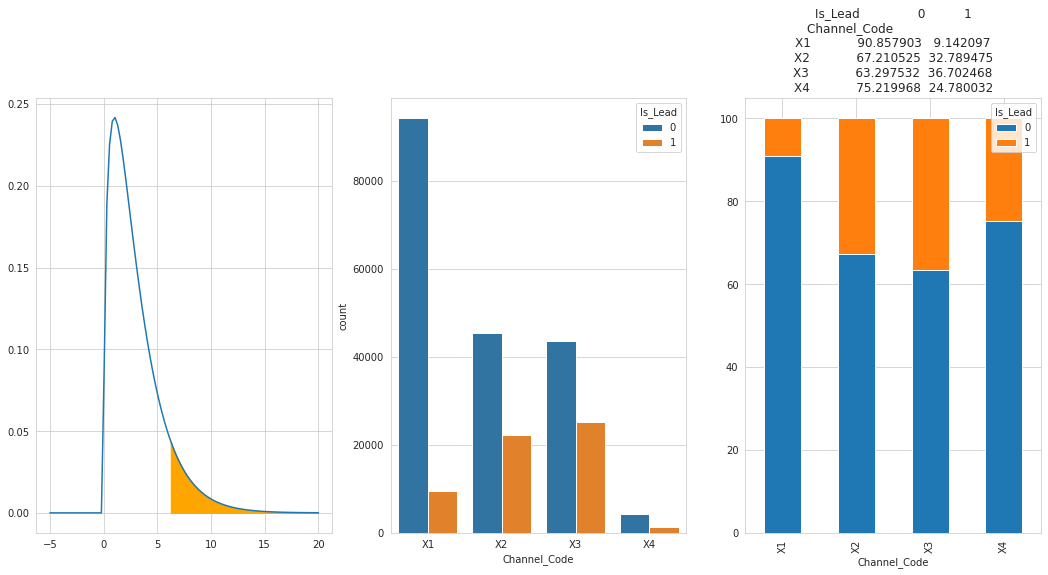

In [106]:
BVA_categorical_plot(data, 'Is_Lead', 'Channel_Code')

**OBSERVATIONS:**
*   By the p_value of Chi square test, we can assume that the channel code has a significant impact on the Is_Lead.
*   By the frequecies, we can assume that channel code X3 are more likely to purchase credit card.

Does **Age_Band** has a significant impact on the **Is_Lead**?

Reject Null Hypothesis
p-value = 0.0
 Is significant= True
 Chi-square = 20748.73


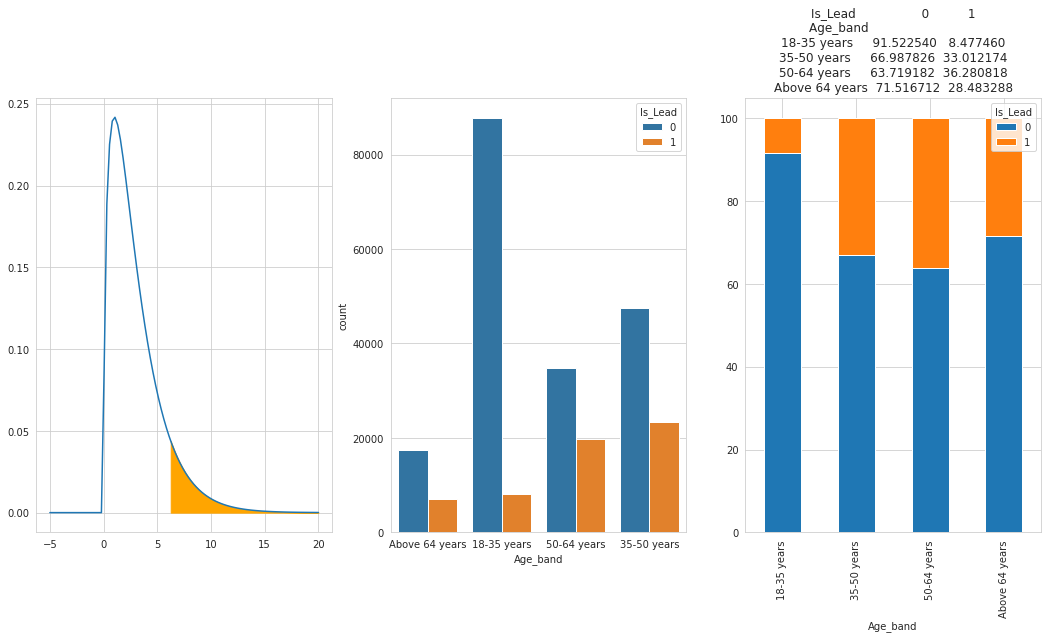

In [107]:
BVA_categorical_plot(data, 'Is_Lead', 'Age_band')

**OBSERVATIONS:**
*   By the p_value of Chi square test, we can assume that the age band has a significant impact on the Is_Lead.
*   By the frequecies, we can assume that age band of 50-64 years are more likely to purchase credit card.

Does **Vintage_cat** has a significant impact on **Is_Lead**?

Reject Null Hypothesis
p-value = 0.0
 Is significant= True
 Chi-square = 22425.01


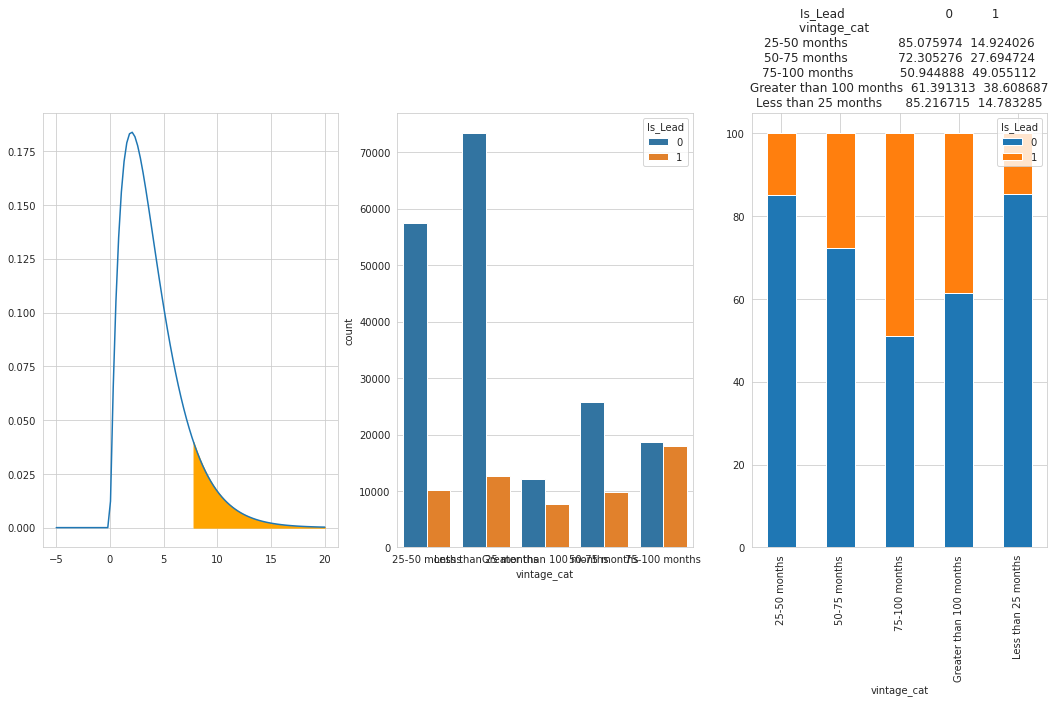

In [108]:
BVA_categorical_plot(data, 'Is_Lead', 'vintage_cat')

**OBSERVATIONS:**
*   By the p_value of Chi square test, we can assume that the vintage_cat has a significant impact on the Is_Lead.
*   By the frequecies, we can assume that vintage category of 75-100 months are more likely to purchase credit card.

## CATEGORICAL - NUMERICAL

Performing z-test and t-test and testing significant level based on hypothesis testing

In [111]:
data['Is_Lead'] = data['Is_Lead'].astype('category')

In [110]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Is_Active']= label_encoder.fit_transform(data['Is_Active'])
data['Gender']= label_encoder.fit_transform(data['Gender'])

### Performing Z-Test and T-Test

In [112]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
    over = (sigma1**2/N1) + (sigma2**2/N2)
    ovr_sigma = sqrt(over)
    z = (X1 - X2)/ovr_sigma
    pval = 2*(1 - norm.cdf(abs(z)))
    return pval
'''''
Testing if they are equal or not. If p_value < 0.05 we reject the null hypothesis
'''''

def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval
'''''
Testing if they are equal or not. If p_value < 0.05 we reject the null hypothesis
'''''

def Bivariate_cont_cat(data, cont, cat, category):
  x1 = data[cont][data[cat]==data[category]][:]
  x2 = data[cont][~(data[cat]==data[category])][:]
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.mean()
  t_p_val = round(TwoSampT(m1, m2, std1, std2, n1, n2),4)
  z_p_val = round(TwoSampZ(m1, m2, std1, std2, n1, n2),4)
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)
  table = round(table,2)
  plt.figure(figsize = (15,6), dpi=140)
  plt.subplot(1,4,1)
  sns.barplot([str(category),'not {}'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('n {}'.format(table))
  plt.subplot(1,4,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')
  plt.subplot(1,4,3)
  x_min = -200
  x_max = 200
  x = np.linspace(x_min, x_max, 100)
  y = norm.pdf(x, m2, std2)
  plt.xlim(x_min, x_max)
  plt.plot(x, y)
  confidence_level = 0.95
  alpha = 1 - confidence_level
  z_critical = norm.ppf(1 - alpha)
  z_critical_left = m2 + (-z_critical * std2)
  z_critical_right = m2 + (z_critical * std2)
  x1 = np.linspace(x_min, z_critical_left, 100)
  y1 = norm.pdf(x1, m2, std2)
  plt.fill_between(x1, y1, color='green')
  x2 = np.linspace(z_critical_right, x_max, 100)
  y2 = norm.pdf(x2, m2, std2)
  plt.fill_between(x2, y2, color='green') 
  plt.scatter(m1, 0)
  plt.annotate("x_bar", (m1, 0.0007))
  plt.title('Z-Test \n p-value={}'.format(z_p_val))
    
    
  plt.subplot(1,4,4)
  x_min = -200
  x_max = 200
  x = np.linspace(x_min, x_max, 100)
  y = norm.pdf(x, m2, std2)
  plt.xlim(x_min, x_max)
  plt.plot(x, y)
  confidence_level = 0.95
  alpha = 1 - confidence_level
  t_critical =t.ppf(1-alpha/2,df=9)
  t_critical_left = m2 + (-t_critical * std2)
  t_critical_right = m2 + (t_critical * std2)
  x1 = np.linspace(x_min, t_critical_left, 100)
  y1 = norm.pdf(x1, m2, std2)
  plt.fill_between(x1, y1, color='orange')
  x2 = np.linspace(t_critical_right, x_max, 100)
  y2 = norm.pdf(x2, m2, std2)
  plt.fill_between(x2, y2, color='orange') 
  plt.scatter(m1, 0)
  plt.annotate("x_bar", (m1, 0.0007))
  plt.title('T-Test \n p-value={}'.format(t_p_val))

Is the average account balance of the customer who are active equal to that of customer who will purchase credit card?

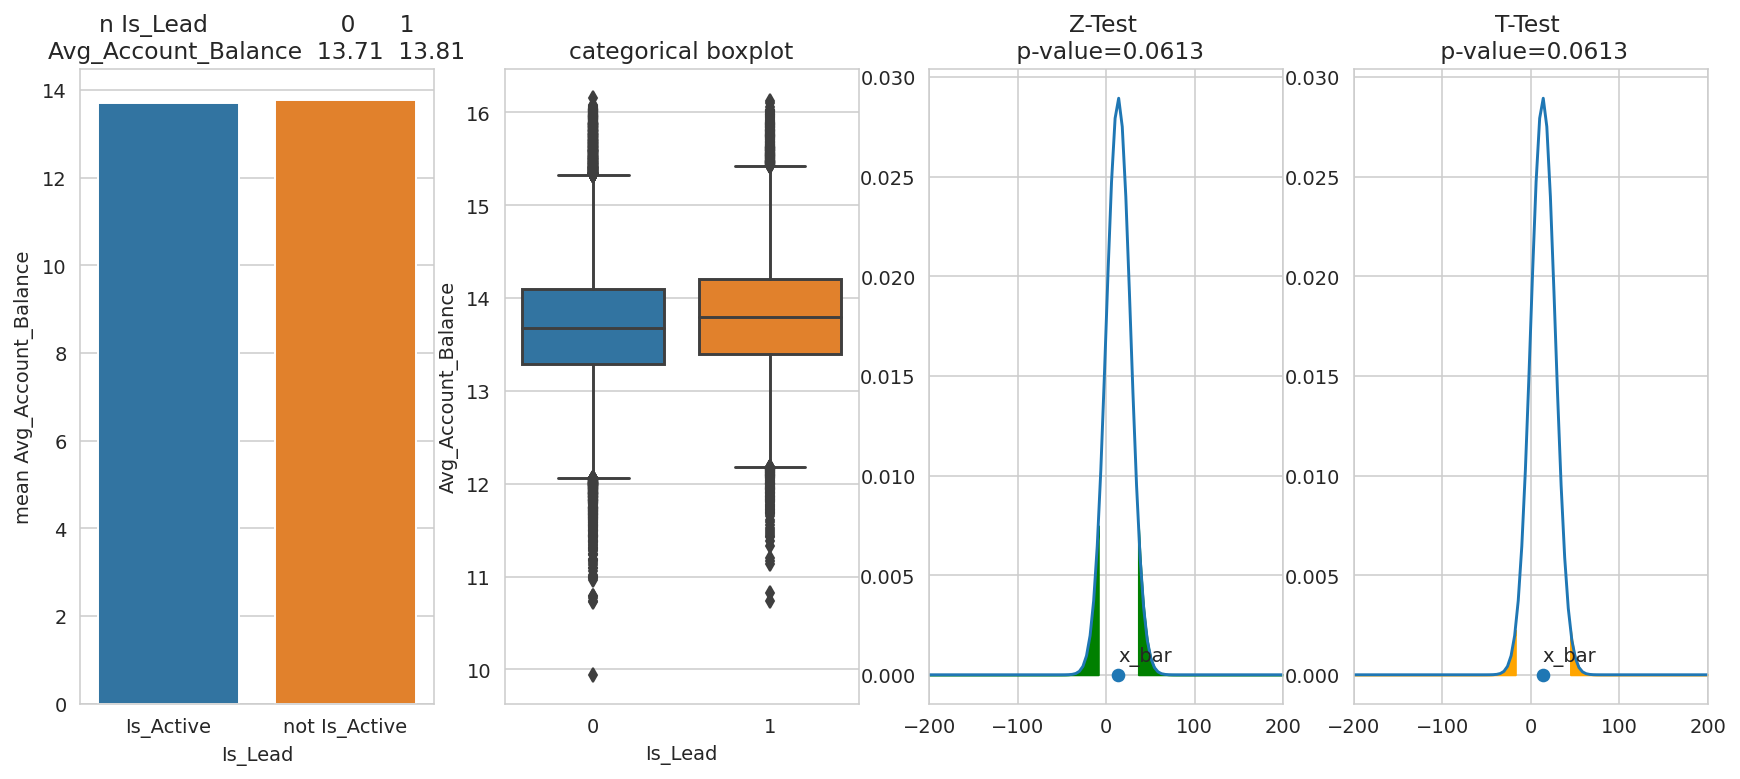

In [113]:
Bivariate_cont_cat(data, 'Avg_Account_Balance', 'Is_Lead', 'Is_Active')

**OBSERVATIONS:**
Since the p-value of t-test and z-test>0.05 it is not significant

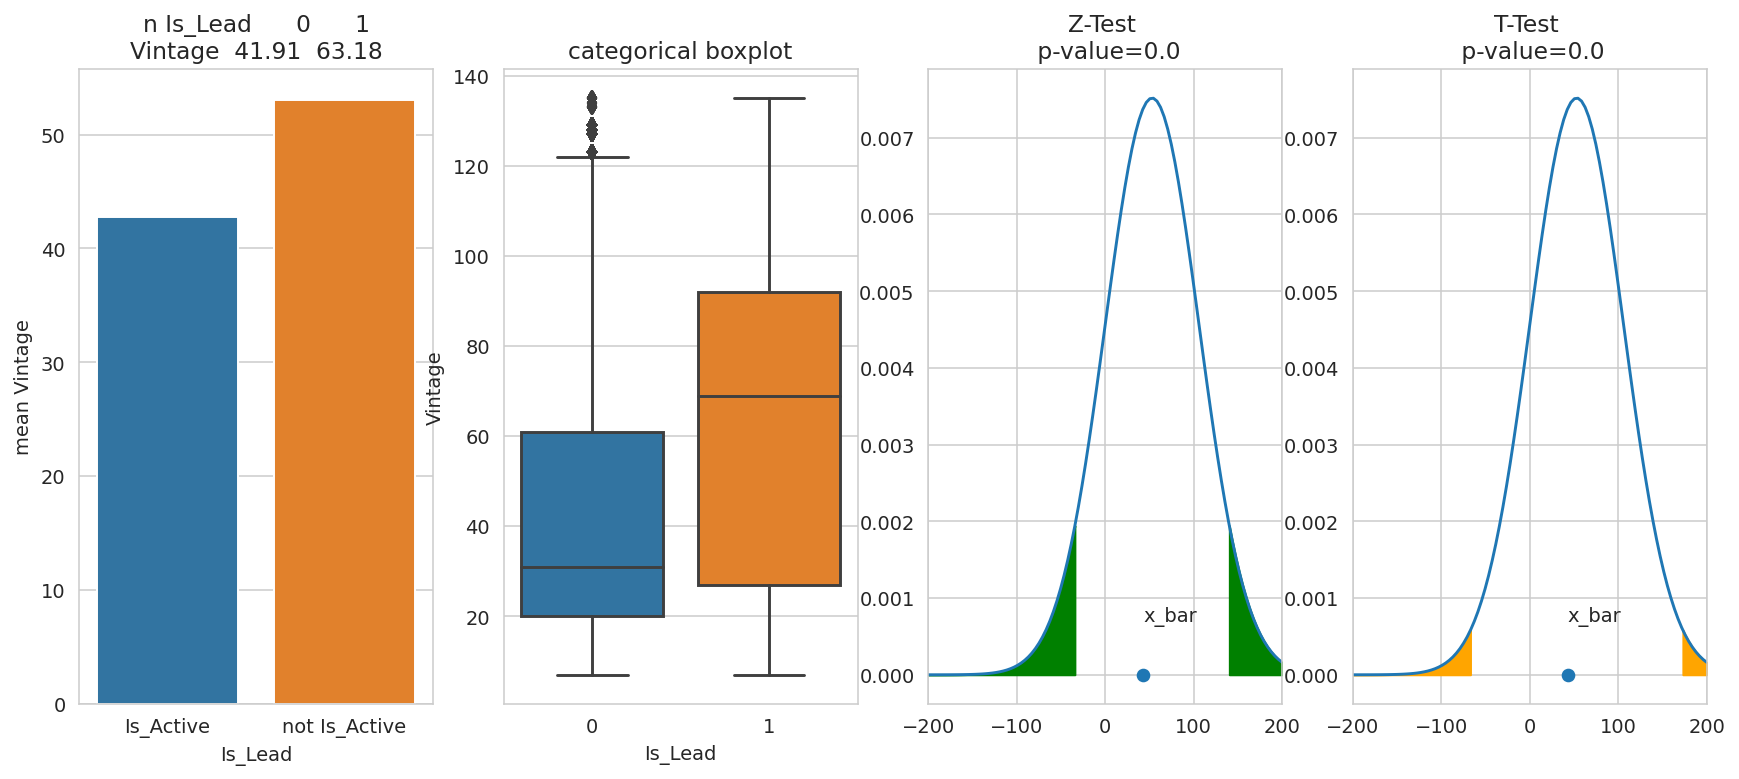

In [117]:
Bivariate_cont_cat(data, 'Vintage', 'Is_Lead', 'Is_Active')

**OBSERVATIONS:**

The average vintage of the customers who are active play a significant role in determining whether customer will purchase credit card.

Is the average age of the customers who are active is equal to the customers who will purchase credit card?

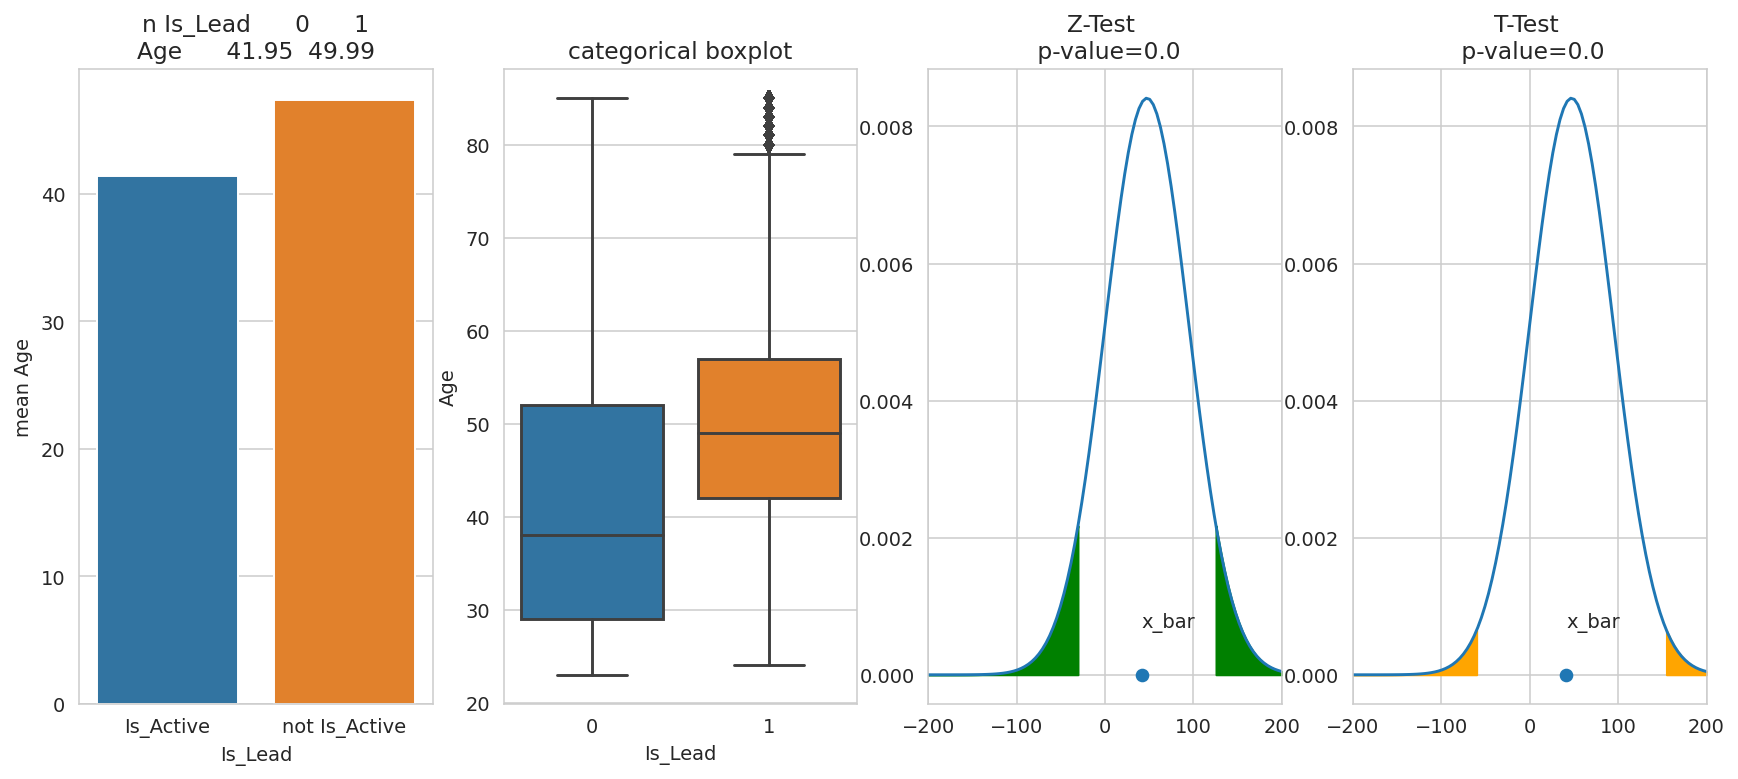

In [114]:
Bivariate_cont_cat(data, 'Age', 'Is_Lead', 'Is_Active')

**OBSERVATIONS:**
Since the p-value of t-test and z-test < 0.05 it is significant and  average age of the customers who are active is equal to the customers who will purchase credit card.

Is the average age of the customers who are male or female play a crutial role determining the significant level of the customers who will purchase credit card?

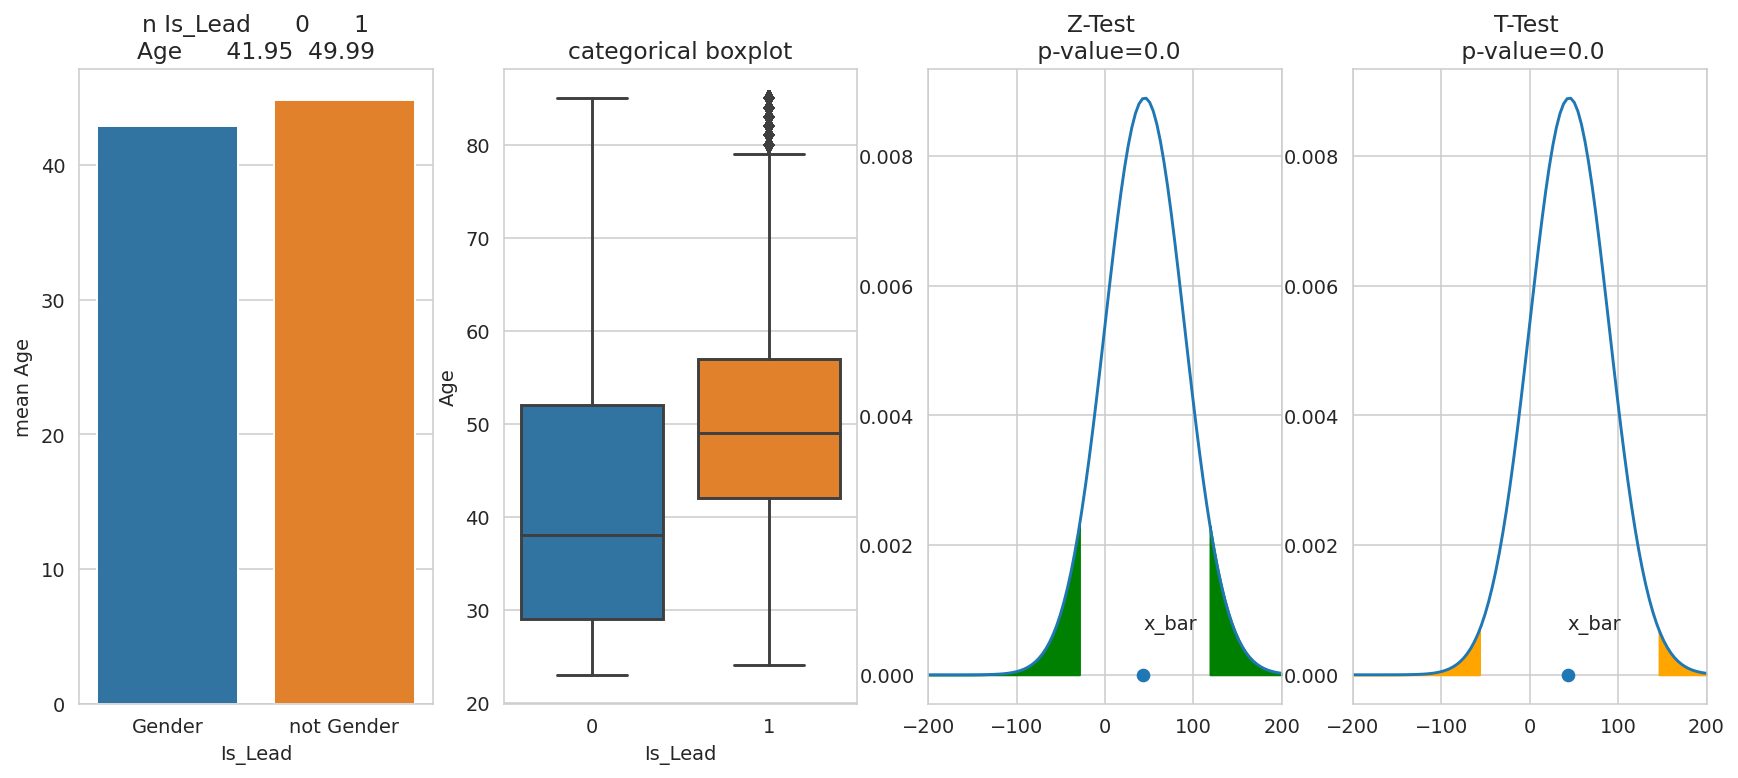

In [115]:
Bivariate_cont_cat(data, 'Age', 'Is_Lead', 'Gender')

**OBSERVATIONS:**
Since the p-value of z-test and t-test is lless than 0.05, the average age of the customers who are male or female play a crutial role determining the significant level of the customers who will purchase credit card.

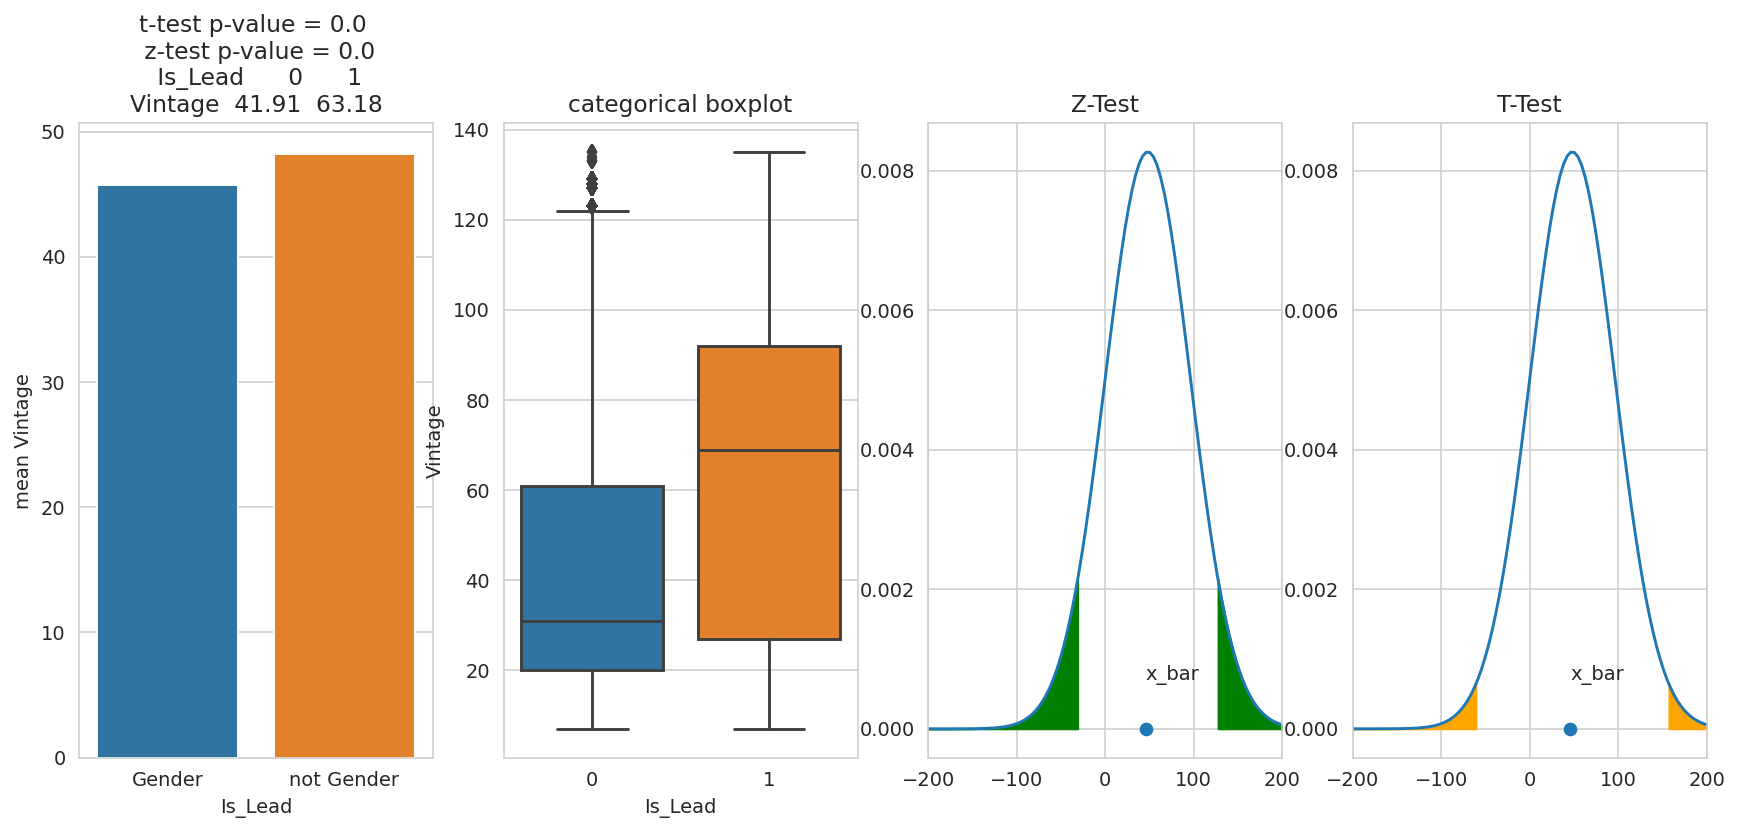

In [ ]:
Bivariate_cont_cat(data, 'Vintage', 'Is_Lead', 'Gender')

Is the average account balance of the customer who is male/female play a significant role to that of customer who will purchase credit card?

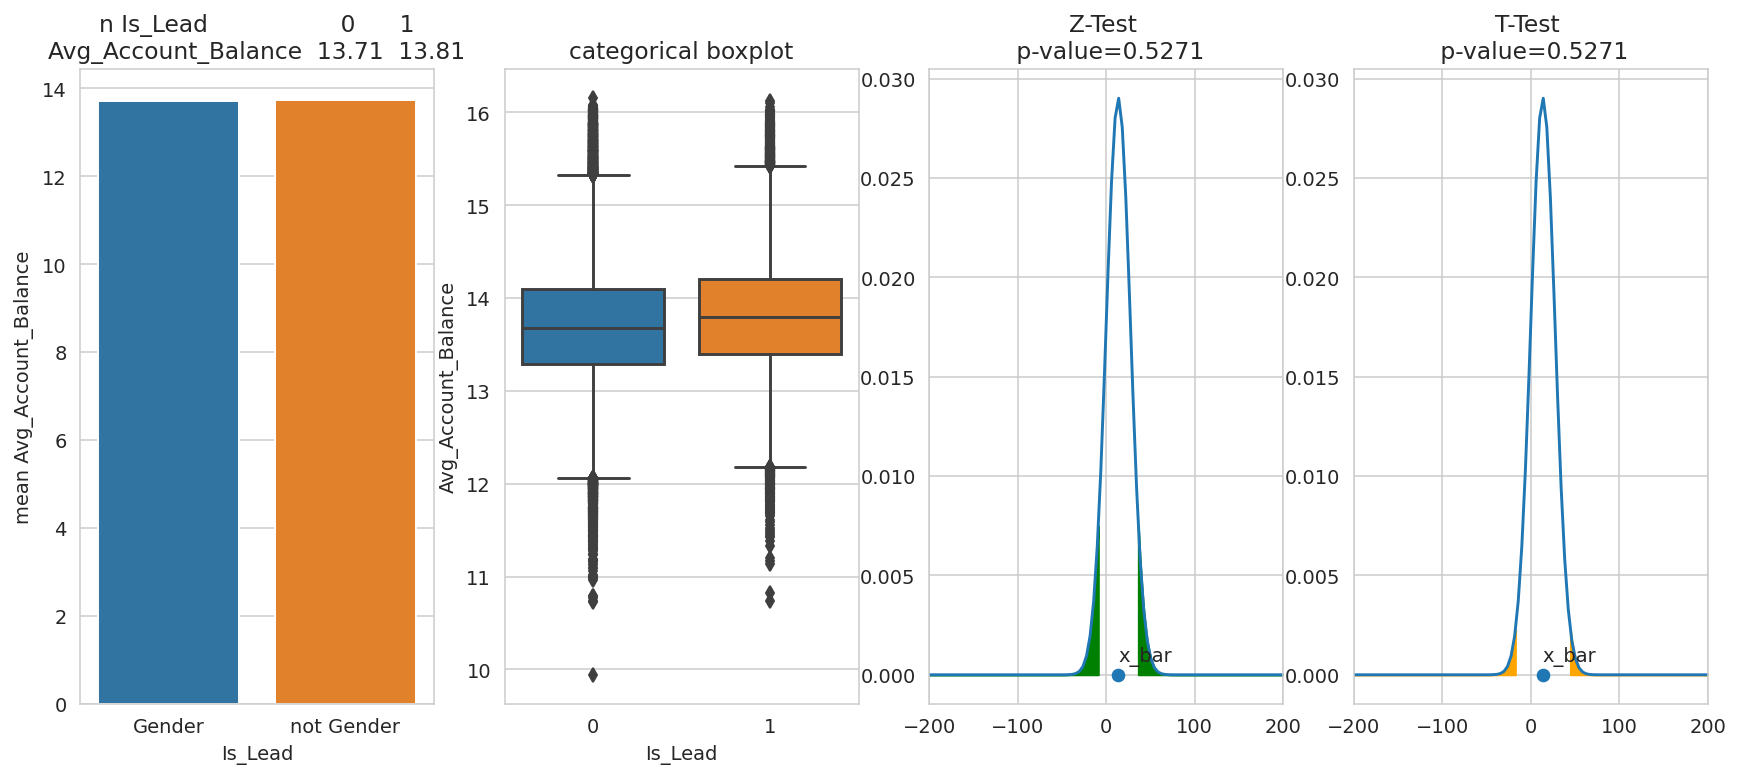

In [116]:
Bivariate_cont_cat(data, 'Avg_Account_Balance', 'Is_Lead', 'Gender')

**OBSERVATIONS:**

Since the p-value of z-test and t-test is more than 0.05 the above condition does not play a significant role.

## MULTIVARIATE ANALYSIS

In [164]:
data['Is_Lead'] = data['Is_Lead'].astype(int)

In [165]:
round(data.pivot_table('Is_Lead', ['Gender', 'Age_band'], 'Occupation', aggfunc='mean')*100,3)

Occupation             Entrepreneur   Other  Salaried  Self_Employed
Gender Age_band                                                     
Female 18-35 years           25.000   4.280     8.444          9.644
       35-50 years           65.689  36.331    47.411         29.071
       50-64 years           67.677  33.680    99.501         29.401
       Above 64 years           NaN  25.962   100.000            NaN
Male   18-35 years           69.231   5.154    10.210         11.945
       35-50 years           65.326  34.714    59.065         28.989
       50-64 years           67.701  37.747    99.264         32.320
       Above 64 years           NaN  30.073   100.000            NaN

**OBSERVATIONS:**

Entrepreneurs are most likely to purchase credit card of age group 50-64 years, Salaried customers shows higher interest in purchasing credit card at age group above 64 years and self employed of age group 50-64 years.Customers shows almost same interest regardless of their gender

In [166]:
round(data.pivot_table('Is_Lead', ['Gender', 'vintage_cat'], 'Occupation', aggfunc='mean')*100,3)

Occupation                      Entrepreneur   Other  Salaried  Self_Employed
Gender vintage_cat                                                           
Female 25-50 months                   56.627  11.676    10.252         17.486
       50-75 months                   64.352  25.679    89.315         25.546
       75-100 months                  75.748  46.526    99.652         44.914
       Greater than 100 months        74.534  31.131    98.855         31.497
       Less than 25 months            48.951  10.934     9.804         20.769
Male   25-50 months                   50.360  14.722    13.810         19.760
       50-75 months                   61.250  25.275    90.111         24.010
       75-100 months                  77.095  47.275    98.518         44.629
       Greater than 100 months        80.128  37.031    99.546         35.260
       Less than 25 months            47.639  15.315    12.285         23.227

**OBSERVATIONS:**

The vintage of entrepreneur and salaried is maximum in greater than 100 months regardless of age.Male and Female customers shows similar same vintage regardless of which occupation. 

In [138]:
round(data.pivot_table('Is_Lead', ['Credit_Product', 'Age_band'], 'Occupation', aggfunc='mean')*100,3)

Occupation                     Entrepreneur   Other  Salaried  Self_Employed
Credit_Product Age_band                                                     
No             18-35 years              NaN   2.287     5.366          4.443
               35-50 years            0.000  10.316    18.102          8.388
               50-64 years            0.000  10.875   100.000         10.073
               Above 64 years           NaN  10.806   100.000            NaN
Unknown        18-35 years          100.000  80.781    87.158         85.827
               35-50 years           86.795  87.920    94.807         84.450
               50-64 years           82.985  82.900    99.385         83.249
               Above 64 years           NaN  81.556   100.000            NaN
Yes            18-35 years           28.571   7.851    14.793         17.751
               35-50 years           52.753  40.921    65.530         34.139
               50-64 years           57.760  38.161    99.107         34.766
               Above 64 years           NaN  30.458       NaN            NaN

In [143]:
round(data.pivot_table('Is_Lead', ['Credit_Product', 'vintage_cat'], 'Occupation', aggfunc='mean')*100,3)

Occupation                              Entrepreneur  ...  Self_Employed
Credit_Product vintage_cat                            ...               
No             25-50 months                    0.000  ...          5.181
               50-75 months                      NaN  ...          8.050
               75-100 months                     NaN  ...         18.250
               Greater than 100 months           NaN  ...          7.496
               Less than 25 months             0.000  ...          5.738
Unknown        25-50 months                   86.131  ...         84.121
               50-75 months                   87.368  ...         83.744
               75-100 months                  84.073  ...         84.029
               Greater than 100 months        86.364  ...         82.678
               Less than 25 months            86.111  ...         84.977
Yes            25-50 months                   37.908  ...         26.988
               50-75 months                   48.844  ...         29.924
               75-100 months                  70.330  ...         47.655
               Greater than 100 months        72.364  ...         38.871
               Less than 25 months            32.959  ...         26.719

[15 rows x 4 columns]

**OBSERVATIONS:**

Credit product of category unknown performs high on almost all occupation and does not depend on age group or vintage.

In [137]:
round(data.pivot_table('Is_Lead', ['Is_Active', 'Age_band'], 'Occupation', aggfunc='mean')*100,3)

Occupation                Entrepreneur   Other  Salaried  Self_Employed
Is_Active Age_band                                                     
0         18-35 years           42.857   4.083     8.630         10.080
          35-50 years           57.409  33.042    44.150         29.242
          50-64 years           59.873  36.295    99.680         31.501
          Above 64 years           NaN  30.448   100.000            NaN
1         18-35 years           71.429   6.728    11.385         12.241
          35-50 years           75.959  37.963    71.792         28.804
          50-64 years           77.540  36.408    98.986         31.062
          Above 64 years           NaN  26.418       NaN            NaN

In [136]:
round(data.pivot_table('Is_Lead', ['Is_Active', 'vintage_cat'], 'Occupation', aggfunc='mean')*100,3)

Occupation                         Entrepreneur  ...  Self_Employed
Is_Active vintage_cat                            ...               
0         25-50 months                   45.902  ...         18.183
          50-75 months                   50.804  ...         23.735
          75-100 months                  72.727  ...         48.671
          Greater than 100 months        78.713  ...         30.956
          Less than 25 months            40.467  ...         22.321
1         25-50 months                   67.626  ...         19.538
          50-75 months                   78.667  ...         25.584
          75-100 months                  80.685  ...         41.447
          Greater than 100 months        77.860  ...         36.086
          Less than 25 months            64.706  ...         21.876

[10 rows x 4 columns]

**OBSERVATIONS:**

Customer who are active performs high on almost all occupation and does not depend on age group or vintage.

In [167]:
round(data.pivot_table('Is_Lead', ['Channel_Code','vintage_cat'], 'Occupation', aggfunc='mean')*100,3)

Occupation                            Entrepreneur  ...  Self_Employed
Channel_Code vintage_cat                            ...               
X1           25-50 months                   49.057  ...         10.722
             50-75 months                   61.111  ...         24.673
             75-100 months                  82.353  ...         47.202
             Greater than 100 months           NaN  ...            NaN
             Less than 25 months            57.500  ...          8.829
X2           25-50 months                   57.143  ...         21.059
             50-75 months                   63.158  ...         24.299
             75-100 months                  74.286  ...         44.471
             Greater than 100 months        82.500  ...         32.071
             Less than 25 months            48.227  ...         27.554
X3           25-50 months                   48.276  ...         23.721
             50-75 months                   61.798  ...         25.076
             75-100 months                  77.974  ...         44.809
             Greater than 100 months        77.829  ...         34.257
             Less than 25 months            52.941  ...         33.528
X4           Less than 25 months            35.526  ...         22.687

[16 rows x 4 columns]

In [141]:
round(data.pivot_table('Is_Lead', ['Channel_Code', 'Age_band'], 'Occupation', aggfunc='mean')*100,3)

Occupation                   Entrepreneur   Other  Salaried  Self_Employed
Channel_Code Age_band                                                     
X1           18-35 years           50.000   3.333     8.026          6.261
             35-50 years           65.217  17.457    17.733         18.374
             50-64 years           46.154  24.549   100.000         20.950
             Above 64 years           NaN  22.069       NaN            NaN
X2           18-35 years           58.333  25.445    47.124         19.881
             35-50 years           63.900  36.447    80.351         28.876
             50-64 years           65.836  35.459    99.168         30.224
             Above 64 years           NaN  27.884   100.000            NaN
X3           18-35 years           66.667  14.241    20.461         20.085
             35-50 years           68.957  43.782    89.993         33.474
             50-64 years           71.233  39.099    99.361         33.873
             Above 64 years           NaN  30.320   100.000            NaN
X4           18-35 years            0.000  17.489    24.700         21.587
             35-50 years           36.667  29.933    55.882         23.795
             50-64 years           35.714  24.104   100.000         20.082
             Above 64 years           NaN  21.703       NaN            NaN

## CONCLUSION

*  Since we imputed the missing value in credit product as unknown, the number of customers belonging in this category are most interested in purchasing credit card.
*  Customers who are Entrepreneurs are less in numbers but are more likely to purchase credit card from the bank.
*  Male customers are more likely to purchase credit card from the bank.
*  Customers who are active are more likely to purchase credit card.
*  Customers who belong to age group 50-64 years are more likely to purchase credit card.
*  Avg_Account_Balance is not factors that the customers buy credit card.

## RECOMMENDATION

*   Channel Code X1 has high number of number of customers but least number of positive response for purchasing credit card.This indicate that there is severe competition in channel code X1 and bank can use some strategy in order to increase customers who wants buy credit card.
*   Must give more importance in the region code RG252,RG256,RG264,RG266 and RG270 in order to attract more customers who can purchase credit card.
*   Bank must focus more on entrepreneur customers rather than salaried customers as they are less in number but are more likely to purchase credit card.